In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fluxes_df= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/dataframe_CPM_fluxes.txt', sep='\t', index_col=0)
fluxes_df

13DAMPPOX  2HBO  2HCO3_NAt  2OXOADOXm  \
IGTModel_IGT_GSM5009231_DP005          0.0   0.0     -500.0        0.0   
IGTModel_IGT_GSM5009232_DP007          0.0   0.0        0.0        0.0   
IGTModel_IGT_GSM5009233_DP008          0.0   0.0        0.0        0.0   
IGTModel_IGT_GSM5009237_DP013          0.0   0.0        0.0        0.0   
IGTModel_IGT_GSM5009241_DP025          0.0   0.0        0.0        0.0   
...                                    ...   ...        ...        ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0   0.0        0.0        0.0   
T3cDModel_T3cD_GSM5009335_DP174        0.0   0.0        0.0        0.0   
T3cDModel_T3cD_GSM5009336_DP176        0.0   0.0        0.0        0.0   
T3cDModel_T3cD_GSM5009339_DP180        0.0   0.0        0.0        0.0   
T3cDModel_T3cD_GSM5009354_DP208        0.0   0.0        0.0        0.0   

                                 2OXOADPTm   34DHOXPEGOX    34DHOXPEGt  \
IGTModel_IGT_GSM5009231_DP005          0.0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009232_DP007          0.0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009233_DP008          0.0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009237_DP013          0.0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009241_DP025          0.0  0.000000e+00  0.000000e+00   
...                                    ...           ...           ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0  3.733017e+00  3.733017e+00   
T3cDModel_T3cD_GSM5009335_DP174        0.0  0.000000e+00  0.000000e+00   
T3cDModel_T3cD_GSM5009336_DP176        0.0  0.000000e+00  0.000000e+00   
T3cDModel_T3cD_GSM5009339_DP180        0.0 -6.875146e-14 -6.875146e-14   
T3cDModel_T3cD_GSM5009354_DP208        0.0  0.000000e+00  0.000000e+00   

                                 34DHPHAMT  34DHPHEt  34DHPLACOX_NADP_  ...  \
IGTModel_IGT_GSM5009231_DP005          0.0       0.0               0.0  ...   
IGTModel_IGT_GSM5009232_DP007          0.0       0.0               0.0  ...   
IGTModel_IGT_GSM5009233_DP008          0.0       0.0               0.0  ...   
IGTModel_IGT_GSM5009237_DP013          0.0       0.0               0.0  ...   
IGTModel_IGT_GSM5009241_DP025          0.0       0.0               0.0  ...   
...                                    ...       ...               ...  ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0       0.0               0.0  ...   
T3cDModel_T3cD_GSM5009335_DP174        0.0       0.0               0.0  ...   
T3cDModel_T3cD_GSM5009336_DP176        0.0       0.0               0.0  ...   
T3cDModel_T3cD_GSM5009339_DP180        0.0       0.0               0.0  ...   
T3cDModel_T3cD_GSM5009354_DP208        0.0       0.0               0.0  ...   

                                 RETNGLCt  RETNGLCtr  UGT1A5r  r0752  r0753  \
IGTModel_IGT_GSM5009231_DP005         0.0        0.0      0.0    0.0    0.0   
IGTModel_IGT_GSM5009232_DP007         0.0        0.0      0.0    0.0    0.0   
IGTModel_IGT_GSM5009233_DP008         0.0        0.0      0.0    0.0    0.0   
IGTModel_IGT_GSM5009237_DP013         0.0        0.0      0.0    0.0    0.0   
IGTModel_IGT_GSM5009241_DP025         0.0        0.0      0.0    0.0    0.0   
...                                   ...        ...      ...    ...    ...   
T3cDModel_T3cD_GSM5009333_DP170       0.0        0.0      0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009335_DP174       0.0        0.0      0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009336_DP176       0.0        0.0      0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009339_DP180       0.0        0.0      0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009354_DP208       0.0        0.0      0.0    0.0    0.0   

                                 r0754  r0755  r0756  r0757  r1939  
IGTModel_IGT_GSM5009231_DP005      0.0    0.0    0.0    0.0    0.0  
IGTModel_IGT_GSM5009232_DP007      0.0    0.0    0.0    0.0    0.0  
IGTModel_IGT_GSM5009233_DP008      0.0    0.0    0.0    0.0    0.0  
IGTModel_IGT_GSM5009237_DP013      0.0    0.0    0.0    0.0    0.0  
IGTModel_IGT

In [3]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [4]:
transformed_fluxes=fluxes_df.applymap(flux_transformer)
transformed_fluxes

13DAMPPOX  2HBO  2HCO3_NAt  2OXOADOXm  \
IGTModel_IGT_GSM5009231_DP005          0.0   0.0  -8.965784        0.0   
IGTModel_IGT_GSM5009232_DP007          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009233_DP008          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009237_DP013          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009241_DP025          0.0   0.0   0.000000        0.0   
...                                    ...   ...        ...        ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009335_DP174        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009336_DP176        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009339_DP180        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009354_DP208        0.0   0.0   0.000000        0.0   

                                 2OXOADPTm   34DHOXPEGOX    34DHOXPEGt  \
IGTModel_IGT_GSM5009231_DP005            0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009232_DP007            0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009233_DP008            0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009237_DP013            0  0.000000e+00  0.000000e+00   
IGTModel_IGT_GSM5009241_DP025            0  0.000000e+00  0.000000e+00   
...                                    ...           ...           ...   
T3cDModel_T3cD_GSM5009333_DP170          0  1.900342e+00  1.900342e+00   
T3cDModel_T3cD_GSM5009335_DP174          0  0.000000e+00  0.000000e+00   
T3cDModel_T3cD_GSM5009336_DP176          0  0.000000e+00  0.000000e+00   
T3cDModel_T3cD_GSM5009339_DP180          0 -1.983969e-13 -1.983969e-13   
T3cDModel_T3cD_GSM5009354_DP208          0  0.000000e+00  0.000000e+00   

                                 34DHPHAMT  34DHPHEt  34DHPLACOX_NADP_  ...  \
IGTModel_IGT_GSM5009231_DP005          0.0         0                 0  ...   
IGTModel_IGT_GSM5009232_DP007          0.0         0                 0  ...   
IGTModel_IGT_GSM5009233_DP008          0.0         0                 0  ...   
IGTModel_IGT_GSM5009237_DP013          0.0         0                 0  ...   
IGTModel_IGT_GSM5009241_DP025          0.0         0                 0  ...   
...                                    ...       ...               ...  ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0         0                 0  ...   
T3cDModel_T3cD_GSM5009335_DP174        0.0         0                 0  ...   
T3cDModel_T3cD_GSM5009336_DP176        0.0         0                 0  ...   
T3cDModel_T3cD_GSM5009339_DP180        0.0         0                 0  ...   
T3cDModel_T3cD_GSM5009354_DP208        0.0         0                 0  ...   

                                 RETNGLCt  RETNGLCtr  UGT1A5r  r0752  r0753  \
IGTModel_IGT_GSM5009231_DP005           0          0        0      0      0   
IGTModel_IGT_GSM5009232_DP007           0          0        0      0      0   
IGTModel_IGT_GSM5009233_DP008           0          0        0      0      0   
IGTModel_IGT_GSM5009237_DP013           0          0        0      0      0   
IGTModel_IGT_GSM5009241_DP025           0          0        0      0      0   
...                                   ...        ...      ...    ...    ...   
T3cDModel_T3cD_GSM5009333_DP170         0          0        0      0      0   
T3cDModel_T3cD_GSM5009335_DP174         0          0        0      0      0   
T3cDModel_T3cD_GSM5009336_DP176         0          0        0      0      0   
T3cDModel_T3cD_GSM5009339_DP180         0          0        0      0      0   
T3cDModel_T3cD_GSM5009354_DP208         0          0        0      0      0   

                                 r0754  r0755  r0756  r0757  r1939  
IGTModel_IGT_GSM5009231_DP005        0      0      0      0      0  
IGTModel_IGT_GSM5009232_DP007        0      0      0      0      0  
IGTModel_IGT_GSM5009233_DP008        0      0      0      0      0  
IGTModel_IGT_GSM5009237_DP013        0      0      0      0      0  
IGTModel_IGT

In [5]:
t_fluxes_filtered = transformed_fluxes.loc[:, (transformed_fluxes != 0).any(axis=0)]
t_fluxes_filtered

13DAMPPOX  2HBO  2HCO3_NAt  2OXOADOXm  \
IGTModel_IGT_GSM5009231_DP005          0.0   0.0  -8.965784        0.0   
IGTModel_IGT_GSM5009232_DP007          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009233_DP008          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009237_DP013          0.0   0.0   0.000000        0.0   
IGTModel_IGT_GSM5009241_DP025          0.0   0.0   0.000000        0.0   
...                                    ...   ...        ...        ...   
T3cDModel_T3cD_GSM5009333_DP170        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009335_DP174        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009336_DP176        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009339_DP180        0.0   0.0   0.000000        0.0   
T3cDModel_T3cD_GSM5009354_DP208        0.0   0.0   0.000000        0.0   

                                  34DHOXPEGOX    34DHOXPEGt  34DHPHAMT  \
IGTModel_IGT_GSM5009231_DP005    0.000000e+00  0.000000e+00        0.0   
IGTModel_IGT_GSM5009232_DP007    0.000000e+00  0.000000e+00        0.0   
IGTModel_IGT_GSM5009233_DP008    0.000000e+00  0.000000e+00        0.0   
IGTModel_IGT_GSM5009237_DP013    0.000000e+00  0.000000e+00        0.0   
IGTModel_IGT_GSM5009241_DP025    0.000000e+00  0.000000e+00        0.0   
...                                       ...           ...        ...   
T3cDModel_T3cD_GSM5009333_DP170  1.900342e+00  1.900342e+00        0.0   
T3cDModel_T3cD_GSM5009335_DP174  0.000000e+00  0.000000e+00        0.0   
T3cDModel_T3cD_GSM5009336_DP176  0.000000e+00  0.000000e+00        0.0   
T3cDModel_T3cD_GSM5009339_DP180 -1.983969e-13 -1.983969e-13        0.0   
T3cDModel_T3cD_GSM5009354_DP208  0.000000e+00  0.000000e+00        0.0   

                                 34HPLFM  3AIBTm  3AIBtmi  ...  r1554  r1565  \
IGTModel_IGT_GSM5009231_DP005        0.0     0.0      0.0  ...    0.0    0.0   
IGTModel_IGT_GSM5009232_DP007        0.0     0.0      0.0  ...    0.0    0.0   
IGTModel_IGT_GSM5009233_DP008        0.0     0.0      0.0  ...    0.0    0.0   
IGTModel_IGT_GSM5009237_DP013        0.0     0.0      0.0  ...    0.0    0.0   
IGTModel_IGT_GSM5009241_DP025        0.0     0.0      0.0  ...    0.0    0.0   
...                                  ...     ...      ...  ...    ...    ...   
T3cDModel_T3cD_GSM5009333_DP170      0.0     0.0      0.0  ...    0.0    0.0   
T3cDModel_T3cD_GSM5009335_DP174      0.0     0.0      0.0  ...    0.0    0.0   
T3cDModel_T3cD_GSM5009336_DP176      0.0     0.0      0.0  ...    0.0    0.0   
T3cDModel_T3cD_GSM5009339_DP180      0.0     0.0      0.0  ...    0.0    0.0   
T3cDModel_T3cD_GSM5009354_DP208      0.0     0.0      0.0  ...    0.0    0.0   

                                 r1573  r1593  r1622  r1630  FOLt2  r2320  \
IGTModel_IGT_GSM5009231_DP005      0.0    0.0    0.0    0.0    0.0    0.0   
IGTModel_IGT_GSM5009232_DP007      0.0    0.0    0.0    0.0    0.0    0.0   
IGTModel_IGT_GSM5009233_DP008      0.0    0.0    0.0    0.0    0.0    0.0   
IGTModel_IGT_GSM5009237_DP013      0.0    0.0    0.0    0.0    0.0    0.0   
IGTModel_IGT_GSM5009241_DP025      0.0    0.0    0.0    0.0    0.0    0.0   
...                                ...    ...    ...    ...    ...    ...   
T3cDModel_T3cD_GSM5009333_DP170    0.0    0.0    0.0    0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009335_DP174    0.0    0.0    0.0    0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009336_DP176    0.0    0.0    0.0    0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009339_DP180    0.0    0.0    0.0    0.0    0.0    0.0   
T3cDModel_T3cD_GSM5009354_DP208    0.0    0.0    0.0    0.0    0.0    0.0   

                                 EX_HC02203[e]  HMR_1321  
IGTModel_IGT_GSM5009231_DP005              0.0       0.0  
IGTModel_IGT_GSM5009232_DP007              0.0       0.0  
IGTModel_IGT_GSM5009233_DP008              0.0       0.0  
IGTModel_IGT_GSM5009237_DP013              0.0       0.0  
IGTModel_IGT_GSM5009241_DP025              0.0       0.0  
...            

C:\Users\NOE\AppData\Local\Temp\ipykernel_39040\2622653370.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


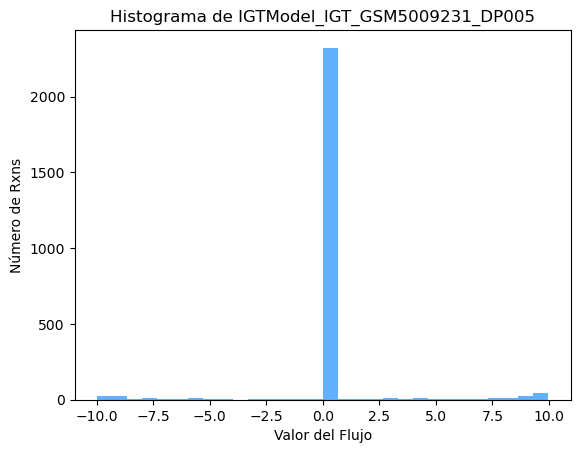

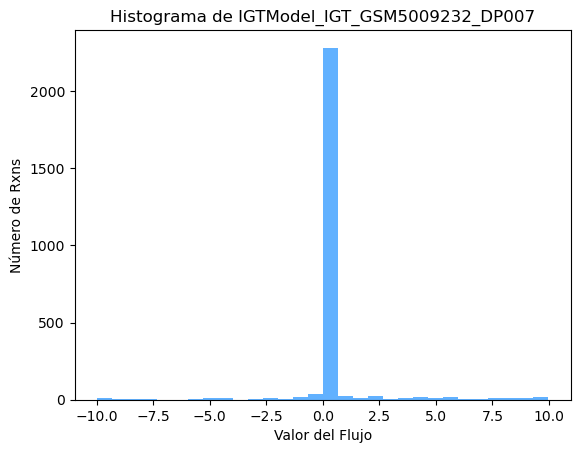

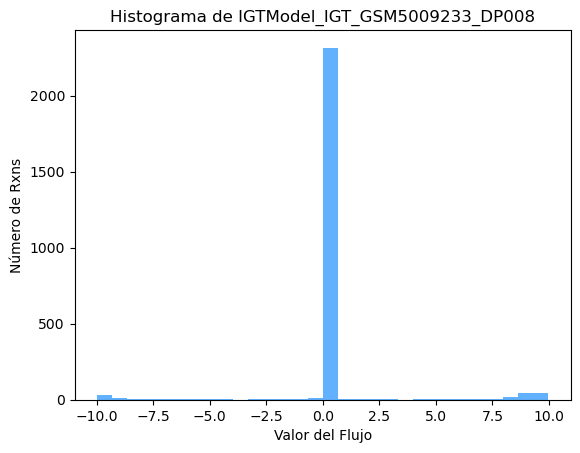

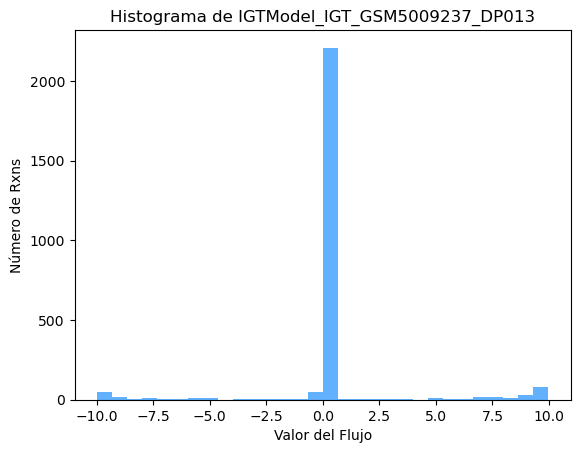

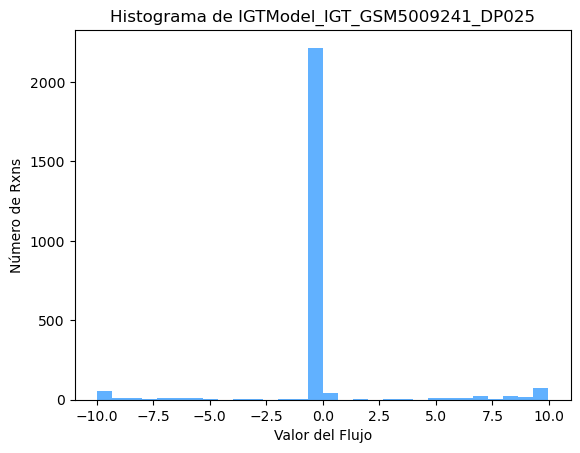

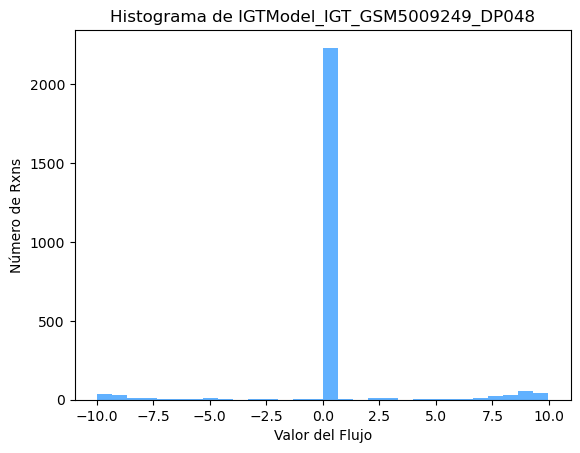

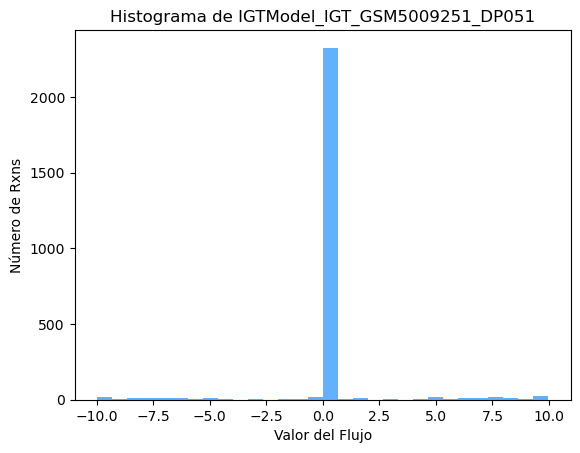

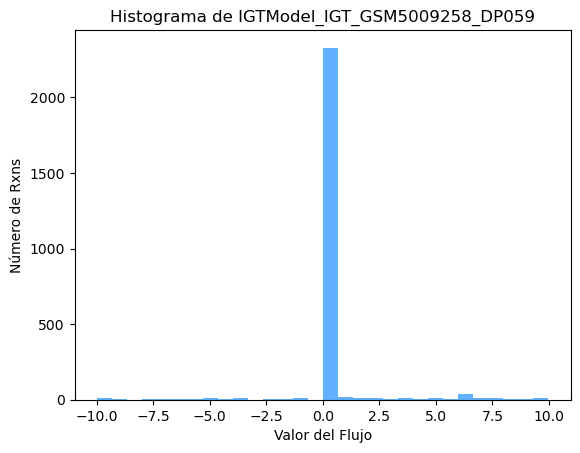

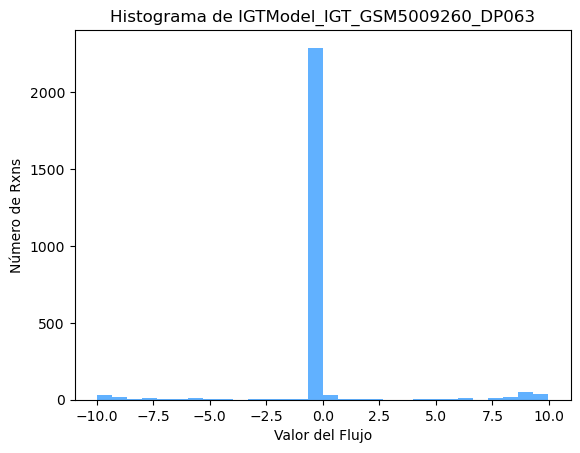

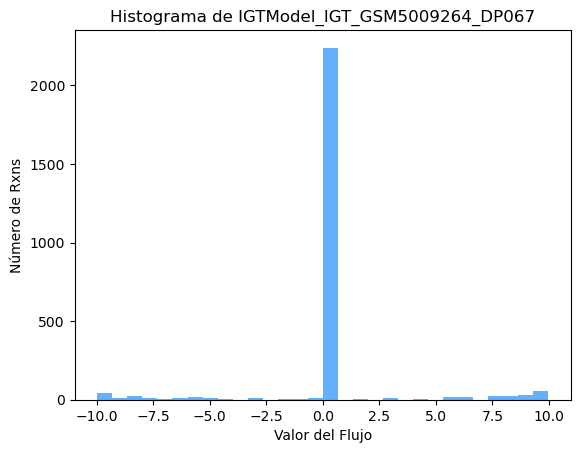

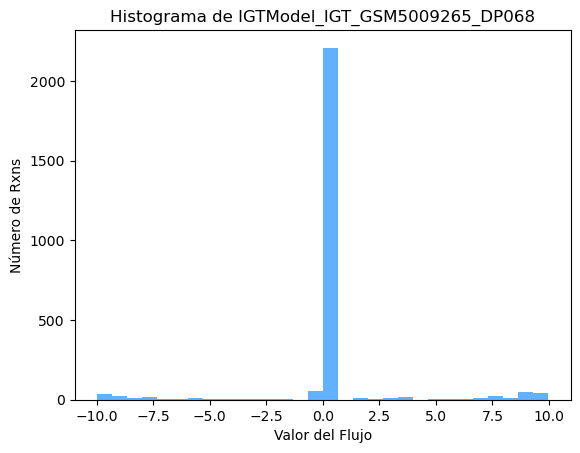

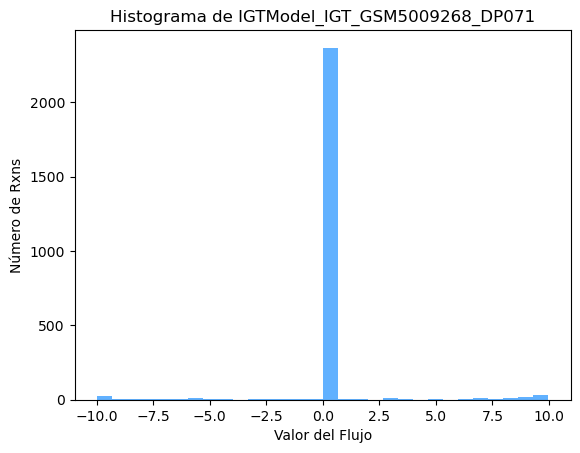

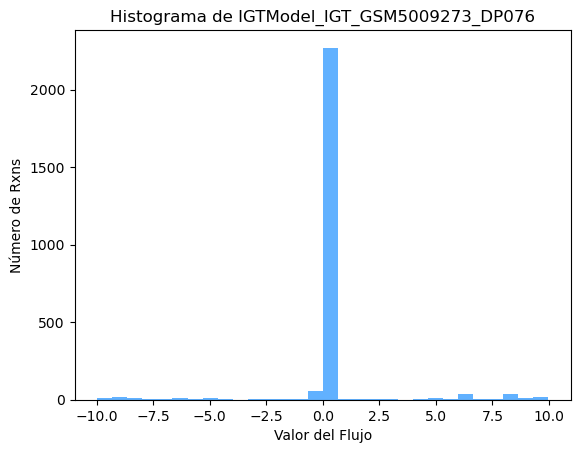

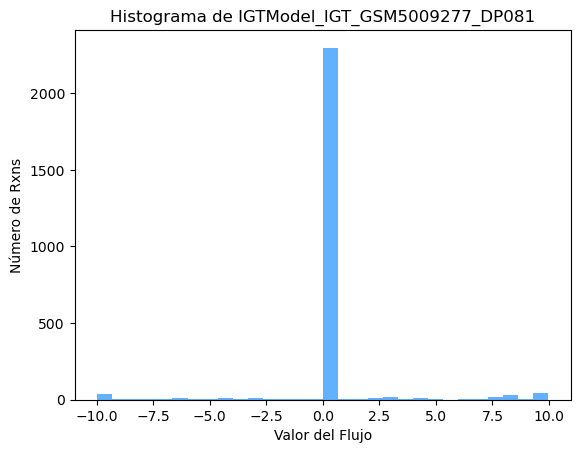

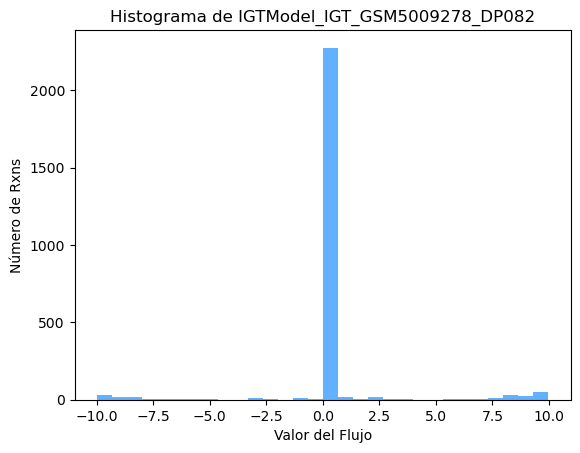

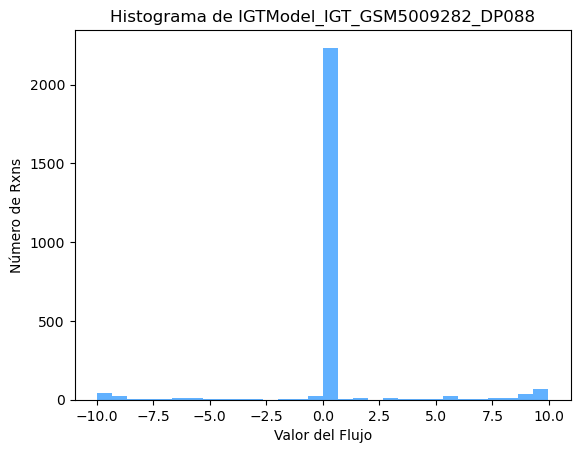

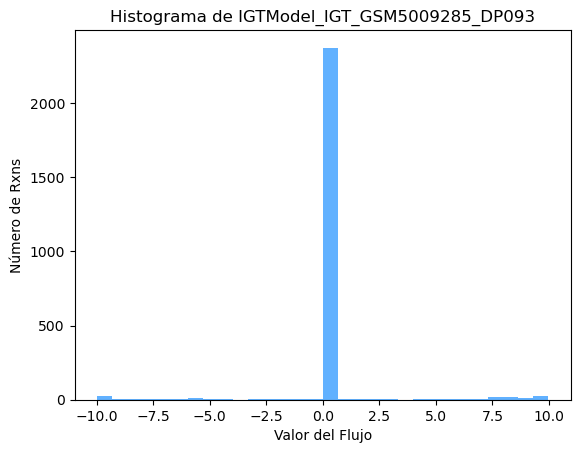

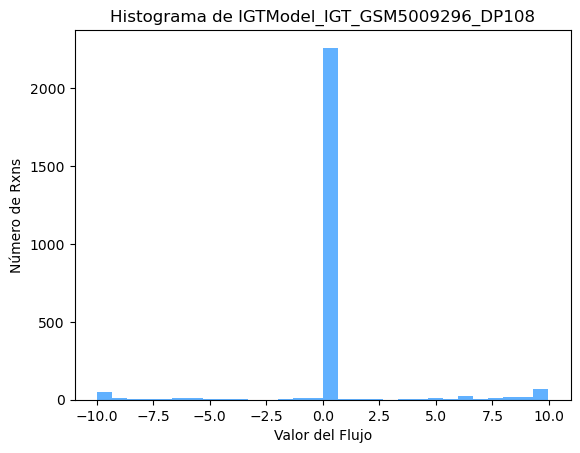

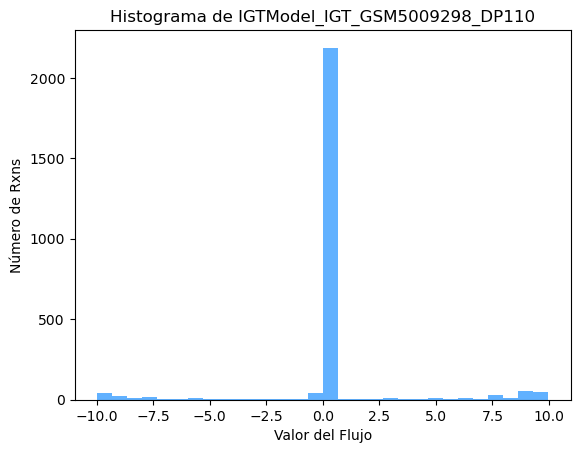

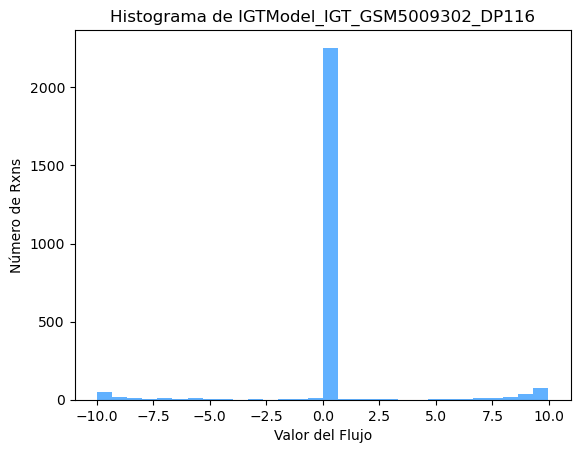

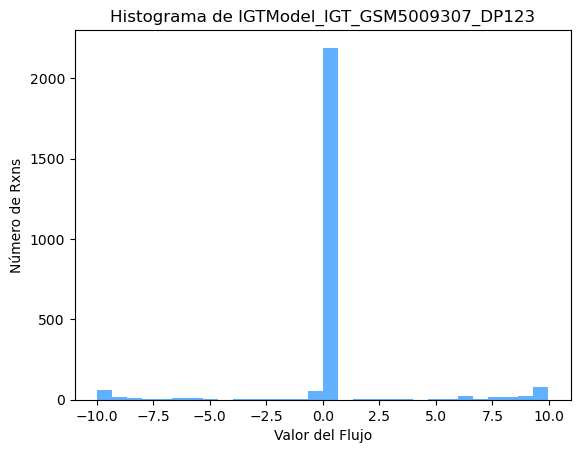

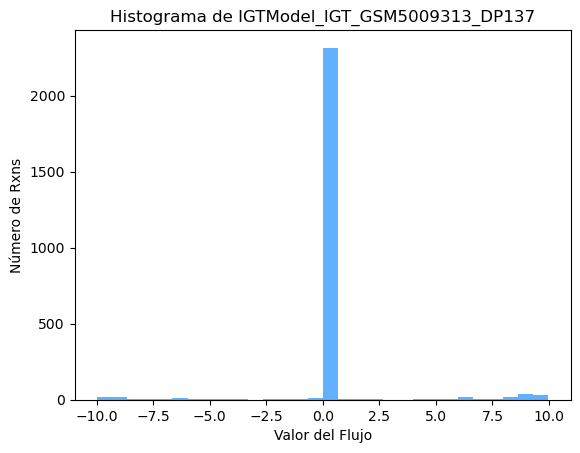

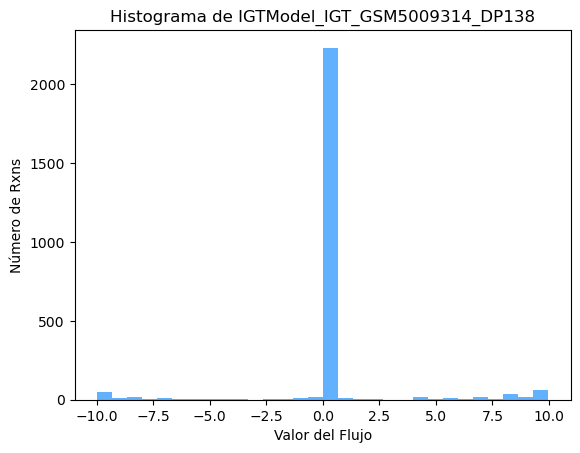

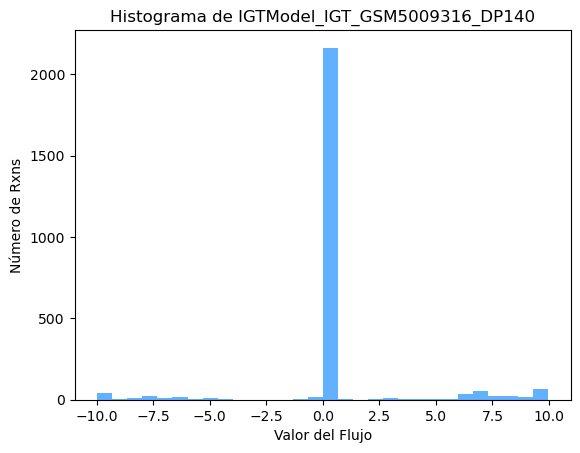

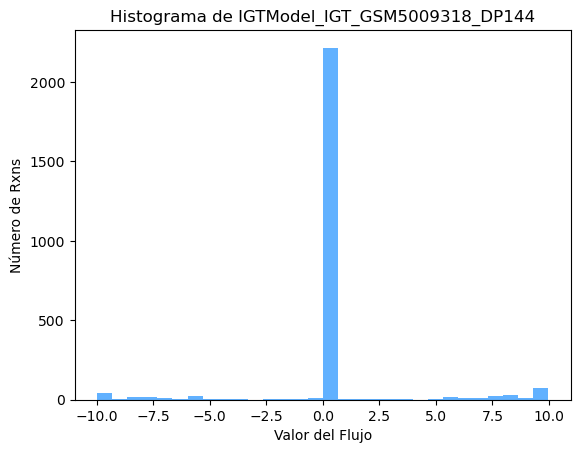

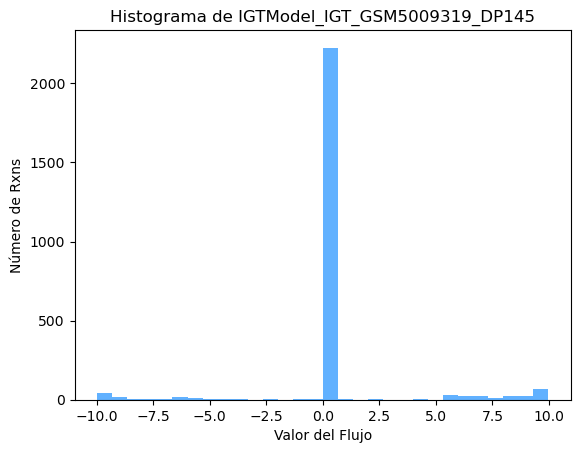

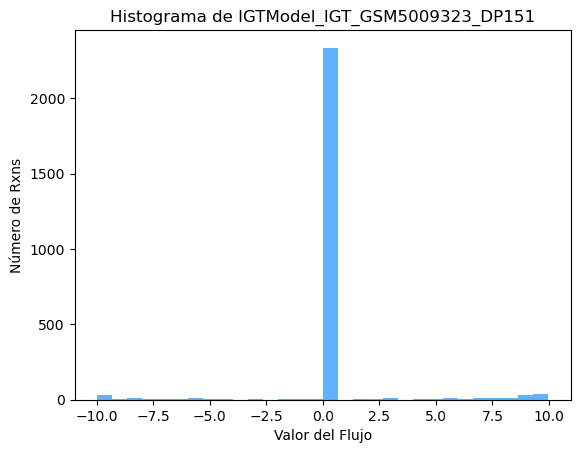

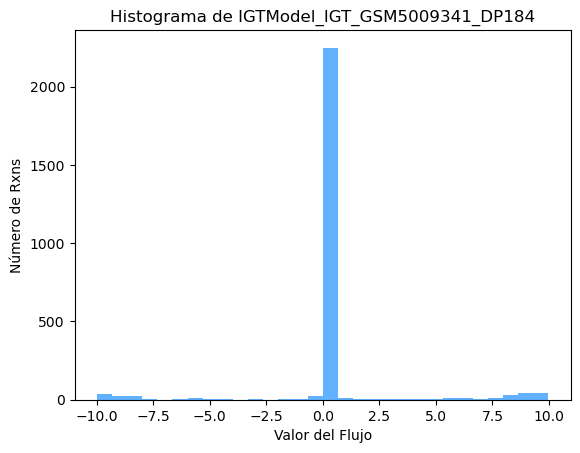

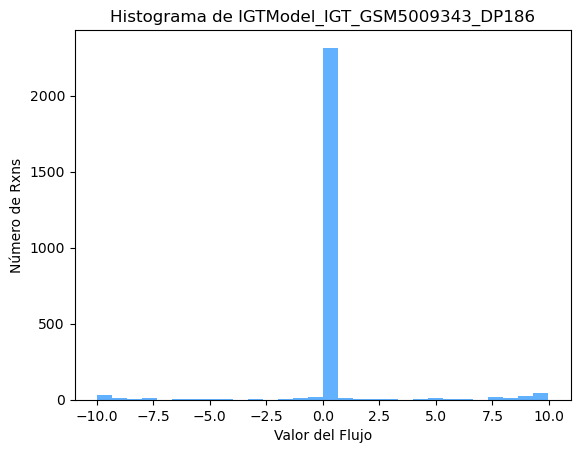

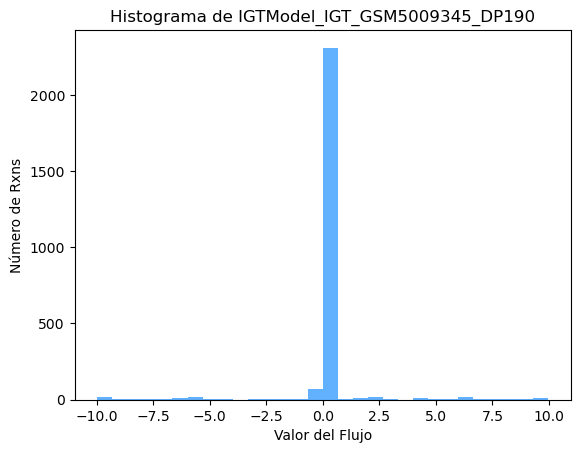

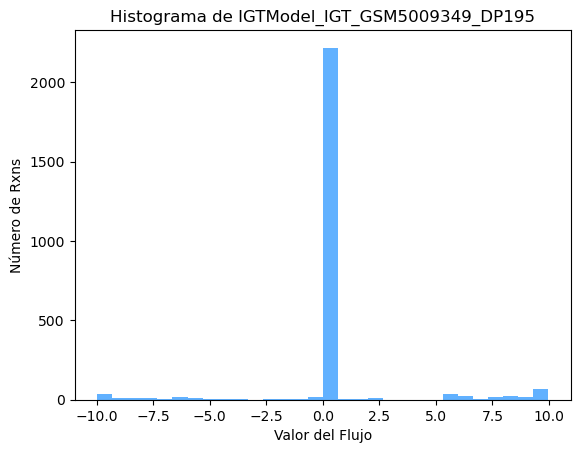

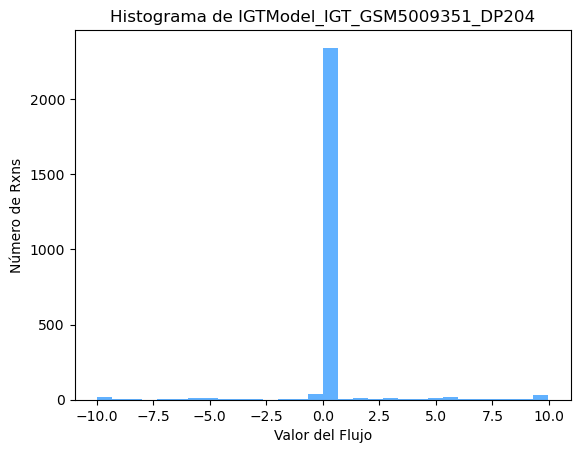

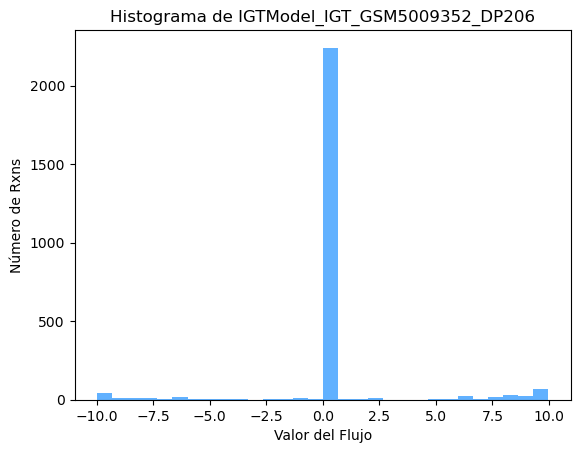

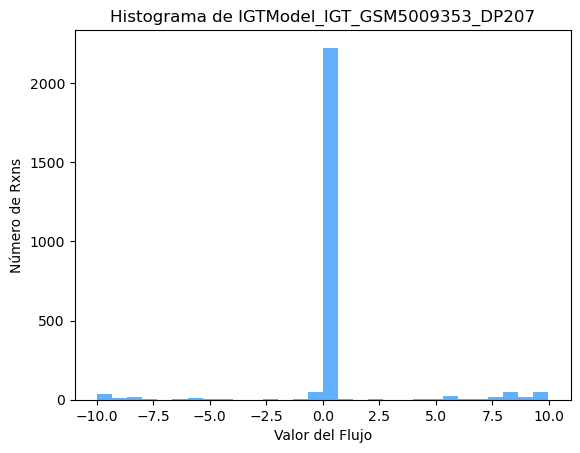

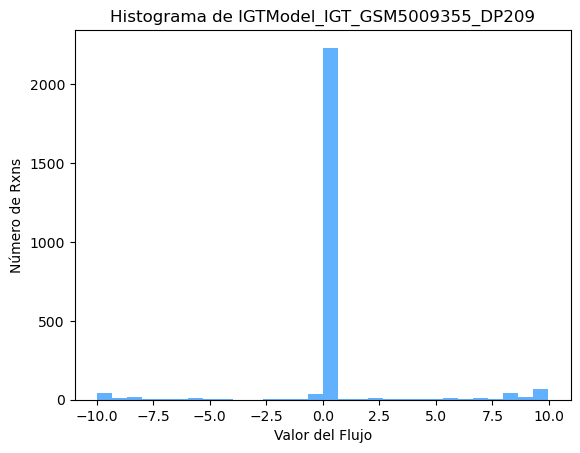

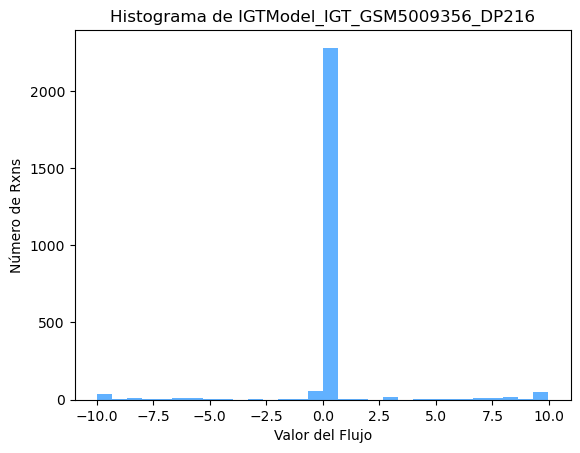

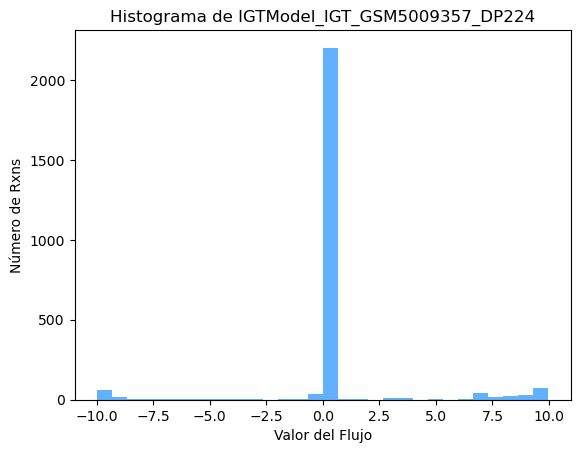

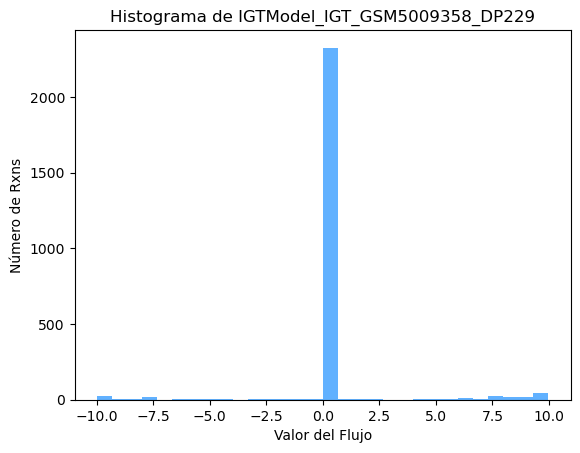

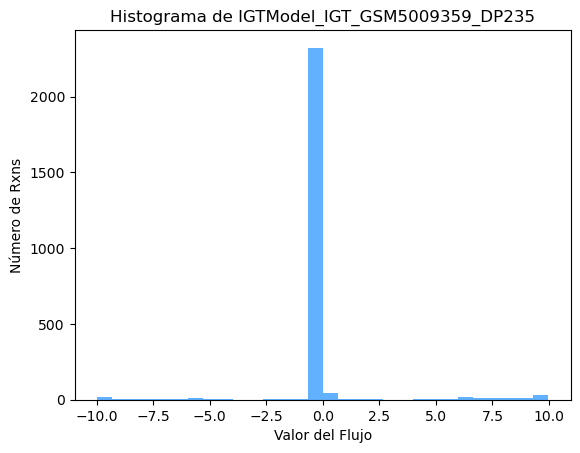

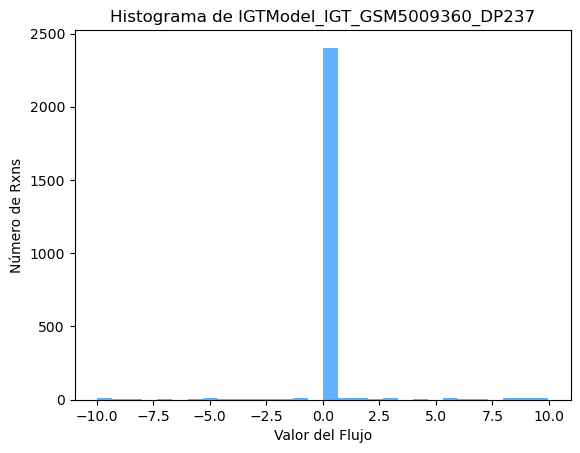

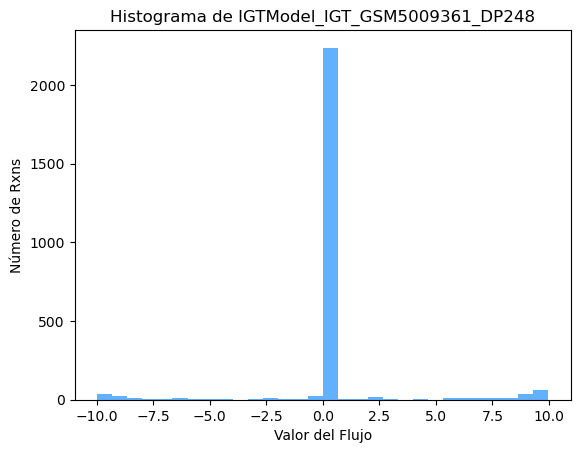

In [6]:
filas_flujos_IGT = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('IGT')]

for indice in filas_flujos_IGT.index:
    fila_data = filas_flujos_IGT.loc[indice]
    plt.figure()  
    hist = plt.hist(fila_data, bins=30, color='dodgerblue', alpha=0.7)
    plt.title(f'Histograma de {indice}')
    plt.xlabel('Valor del Flujo')
    plt.ylabel('Número de Rxns')
plt.show()

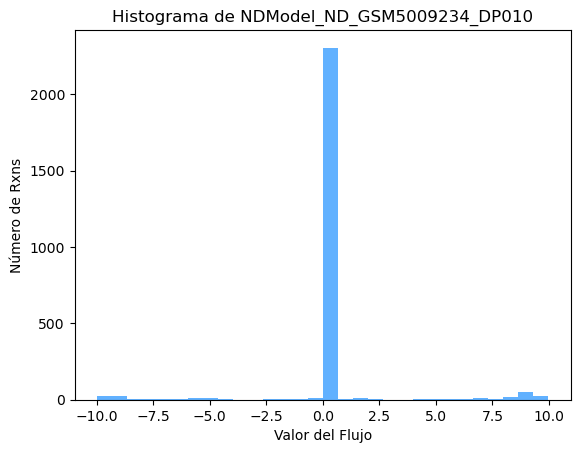

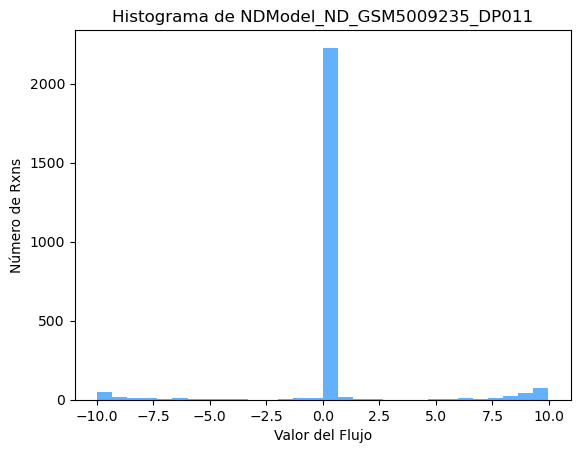

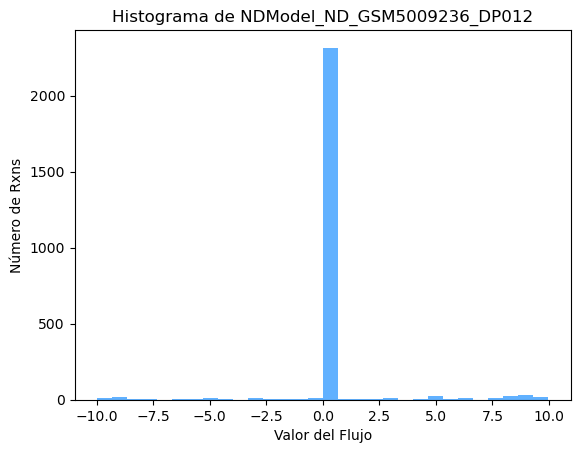

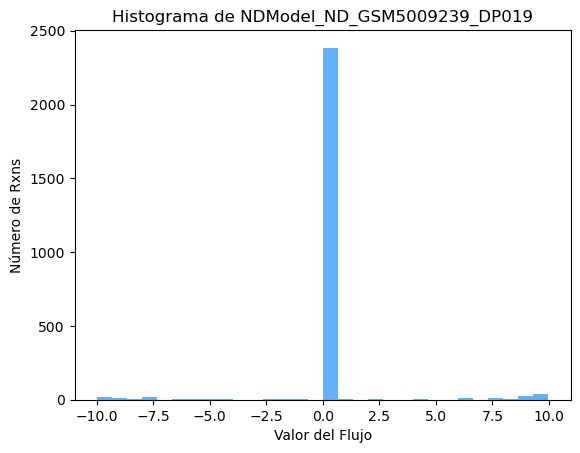

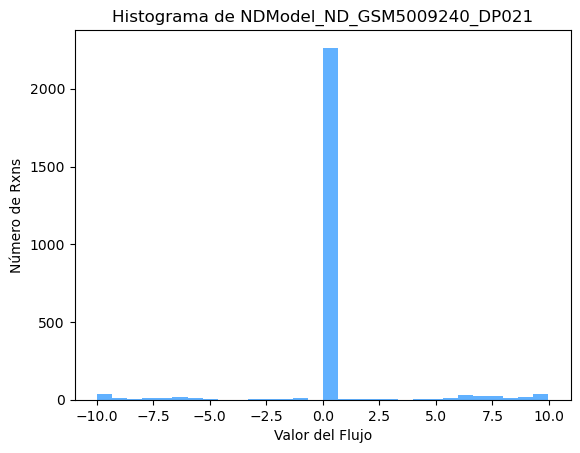

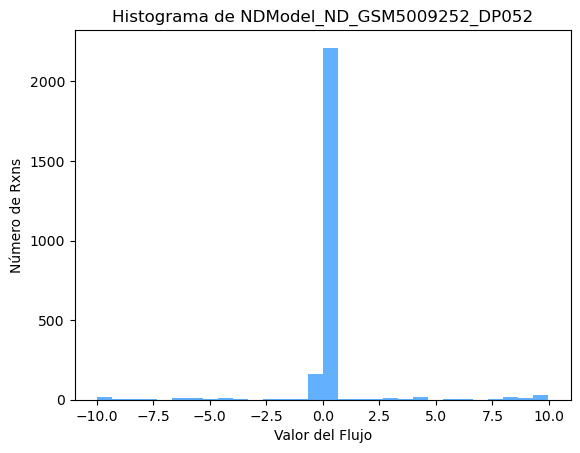

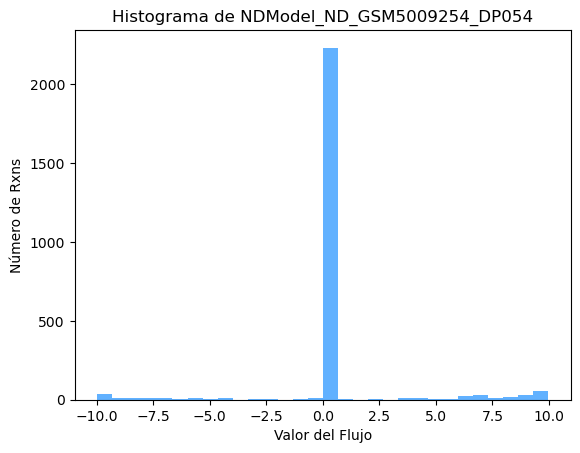

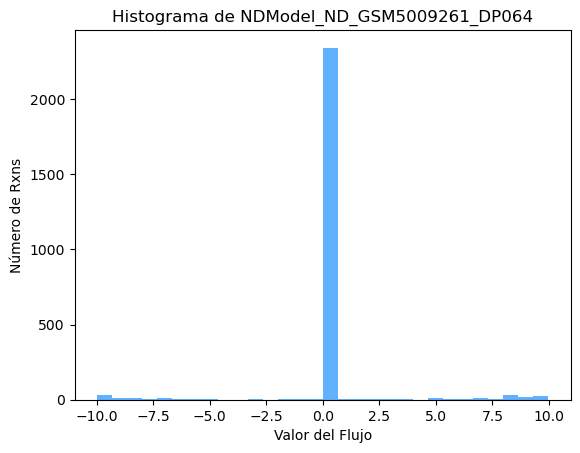

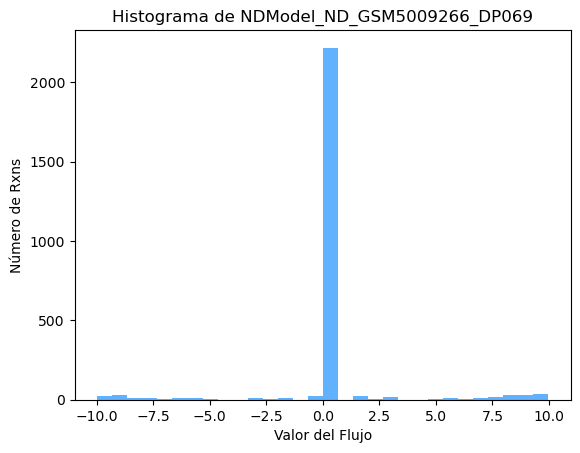

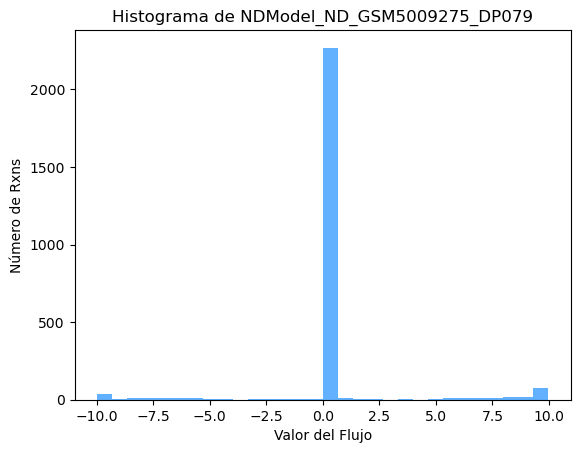

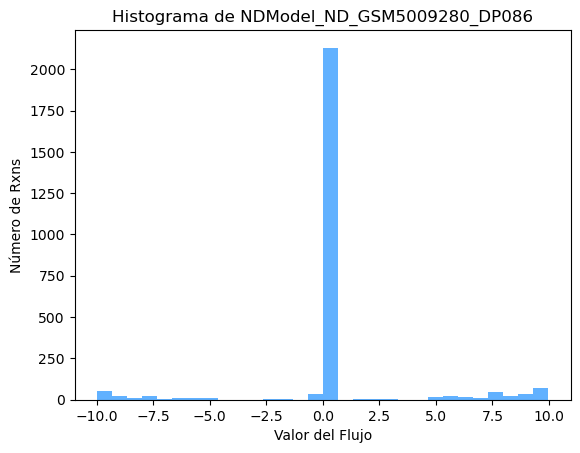

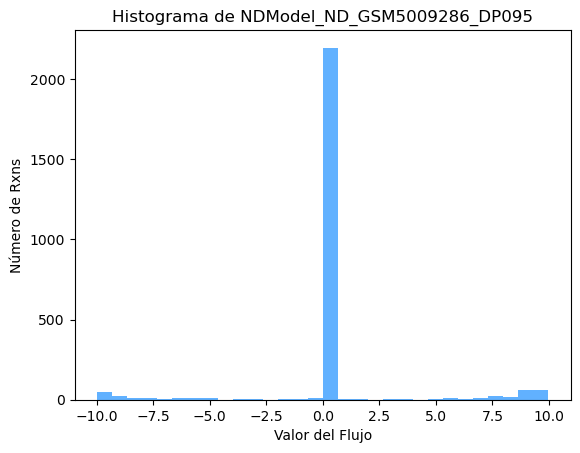

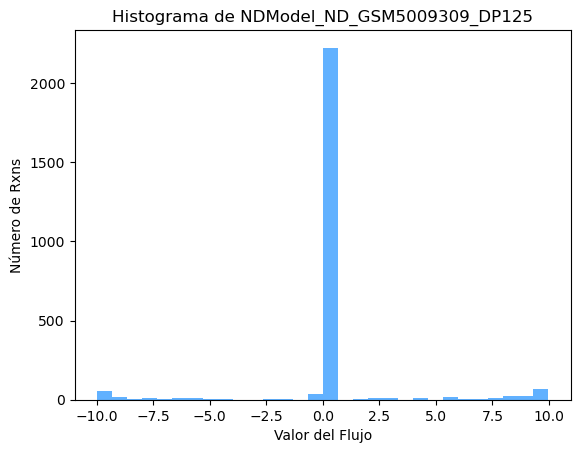

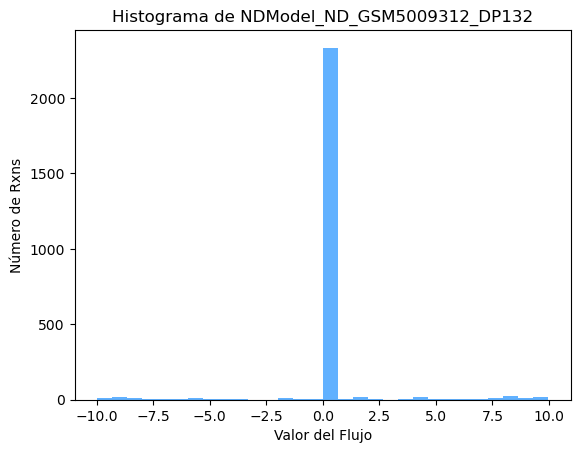

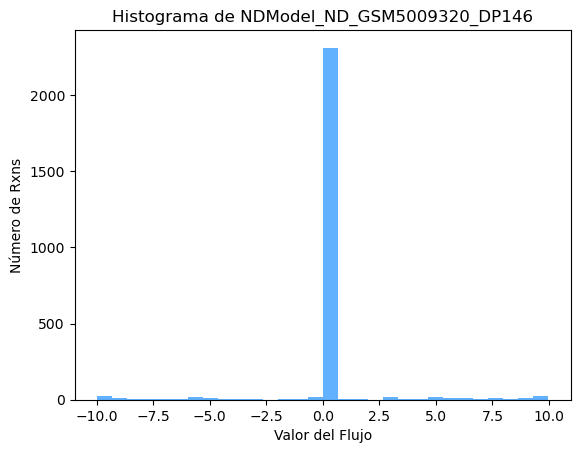

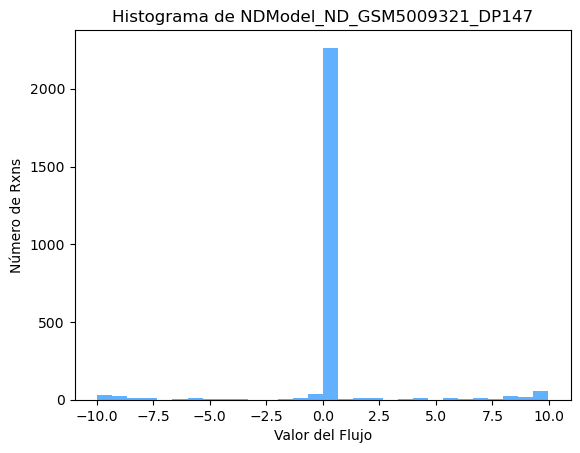

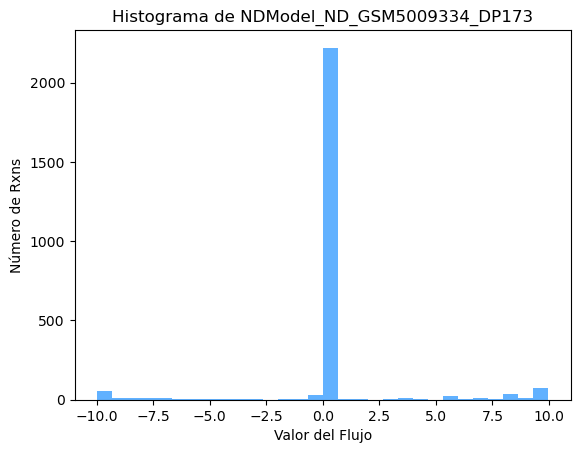

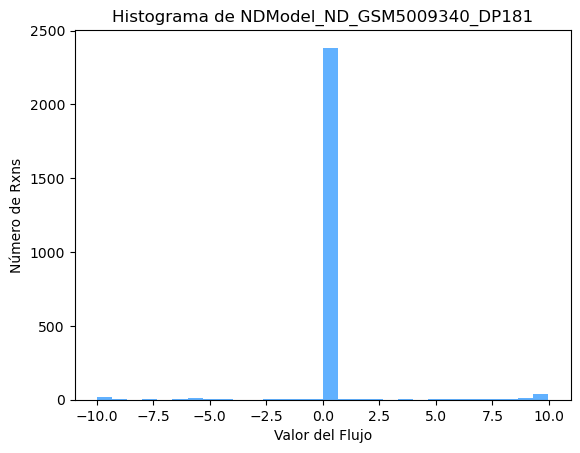

In [7]:
filas_flujos_ND = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('ND')]

for indice in filas_flujos_ND.index:
    fila_data = filas_flujos_ND.loc[indice]
    plt.figure()  
    hist = plt.hist(fila_data, bins=30, color='dodgerblue', alpha=0.7)
    plt.title(f'Histograma de {indice}')
    plt.xlabel('Valor del Flujo')
    plt.ylabel('Número de Rxns')
plt.show()

C:\Users\NOE\AppData\Local\Temp\ipykernel_39040\1304292798.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


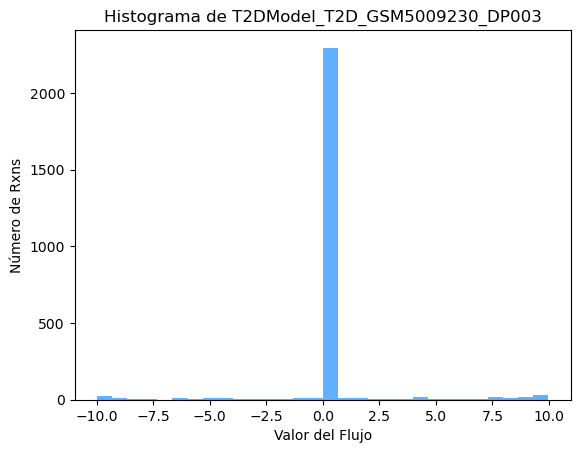

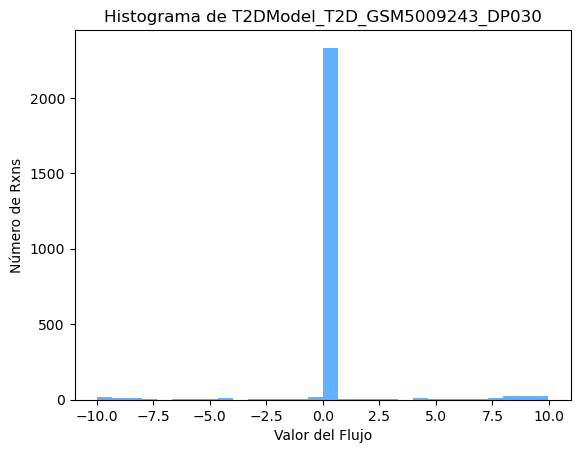

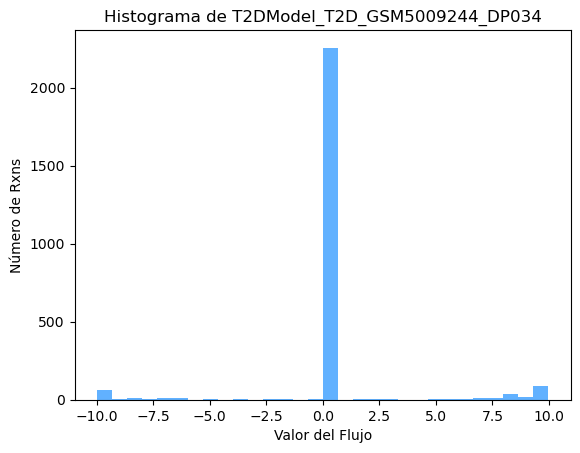

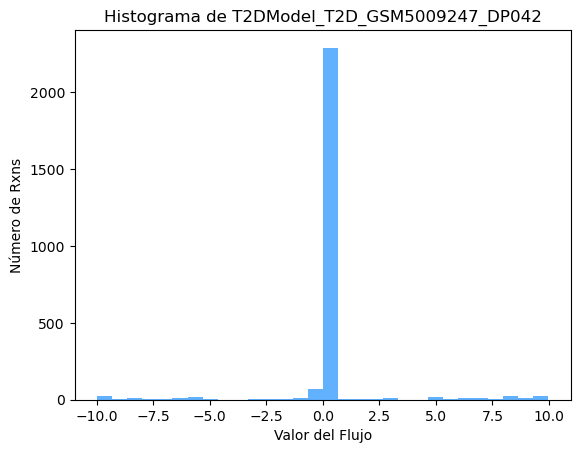

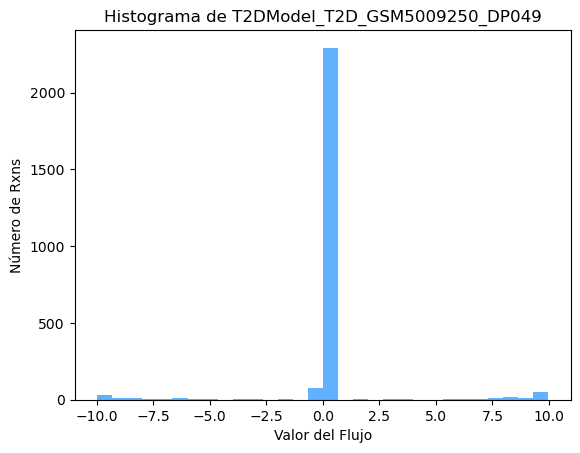

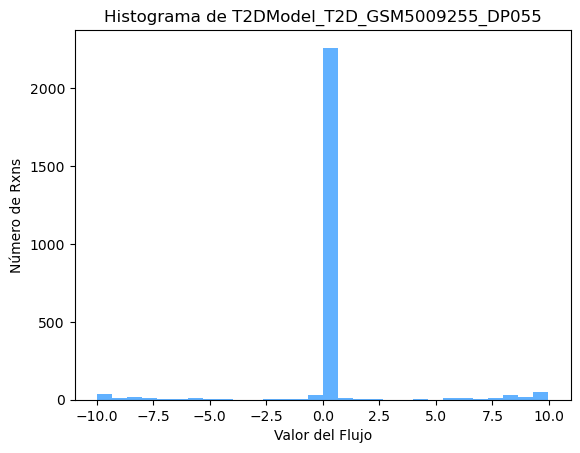

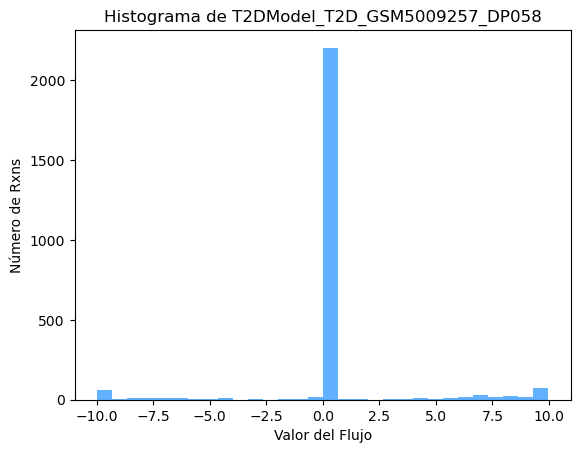

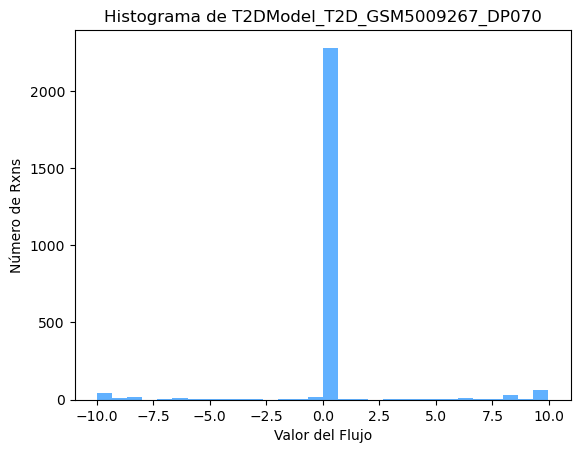

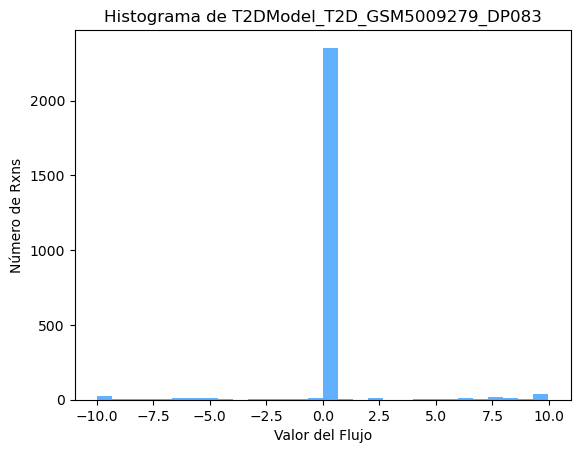

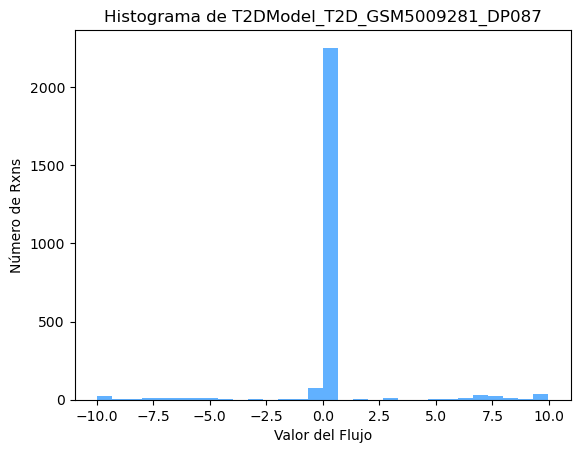

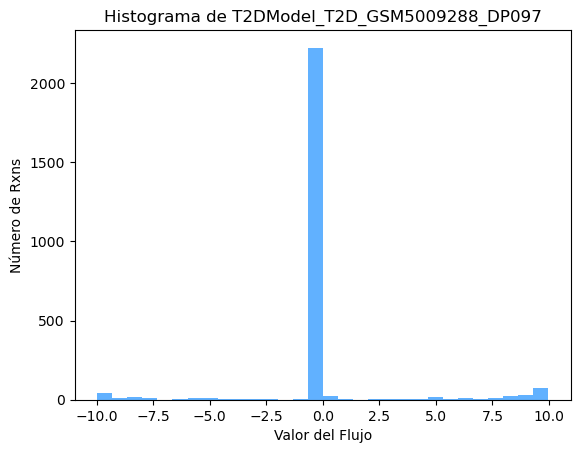

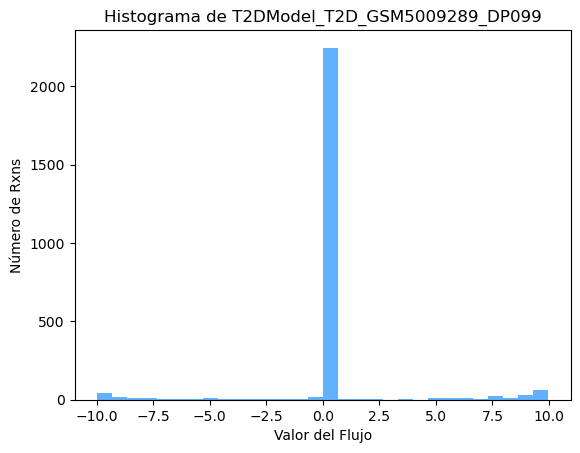

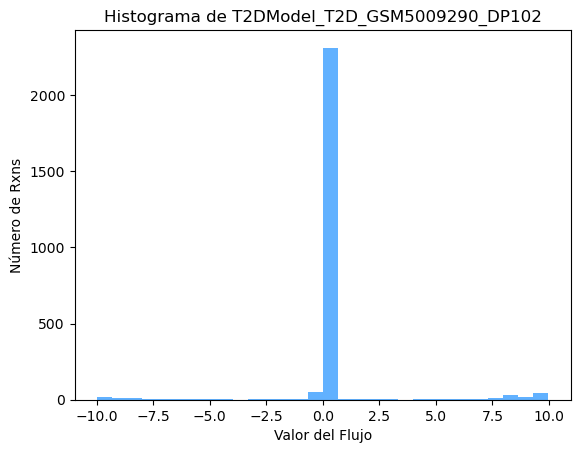

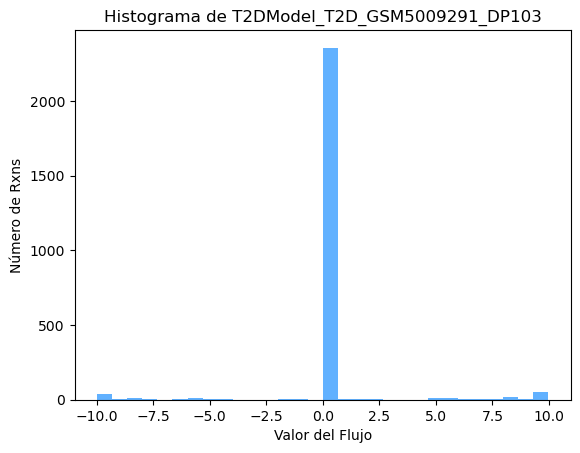

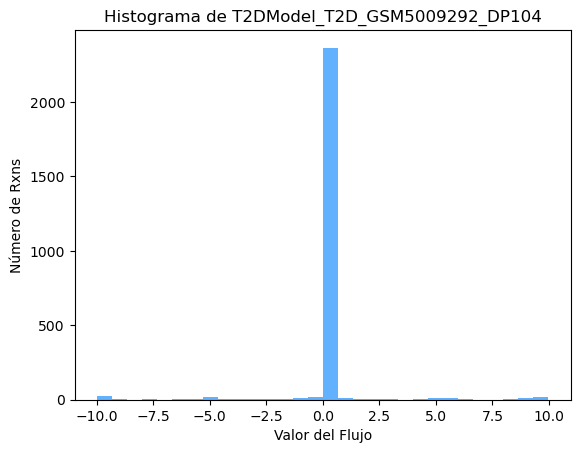

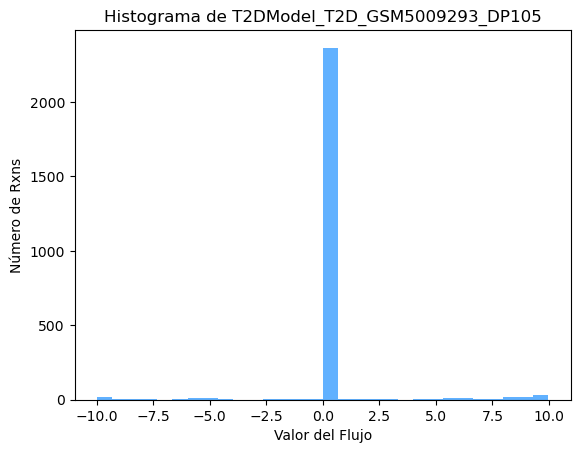

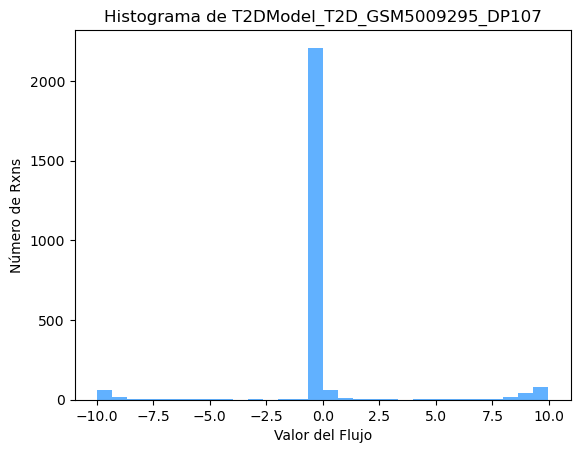

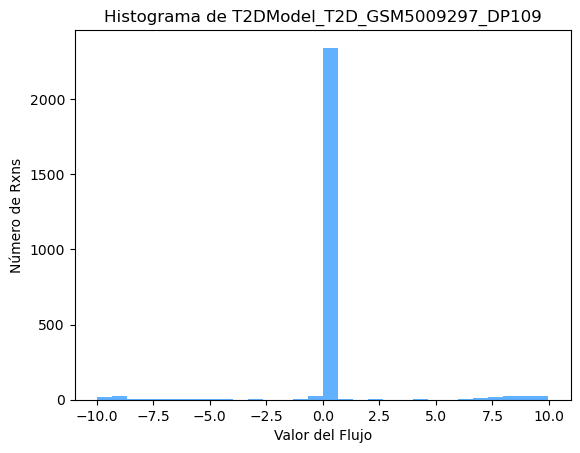

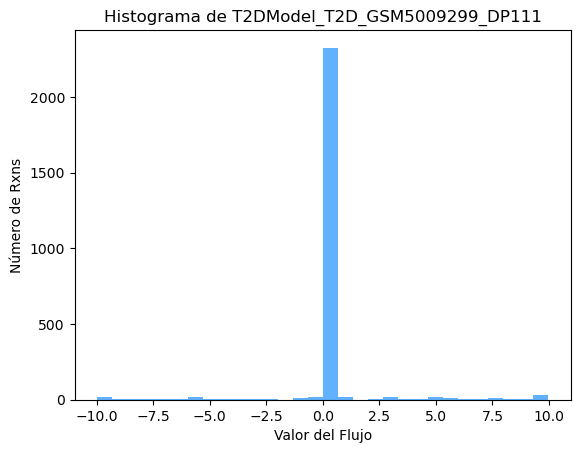

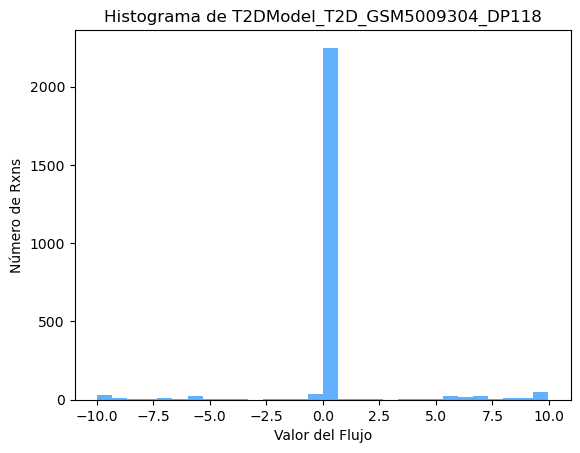

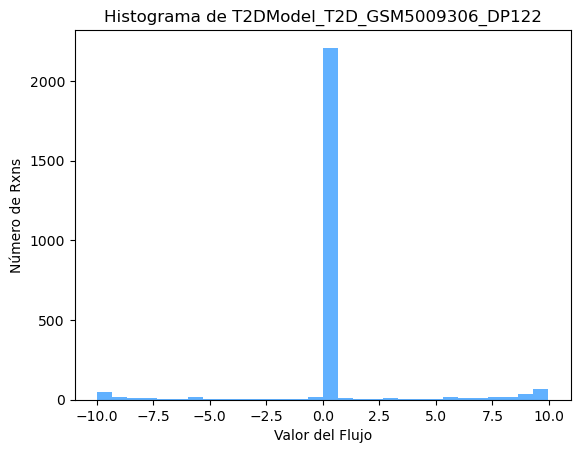

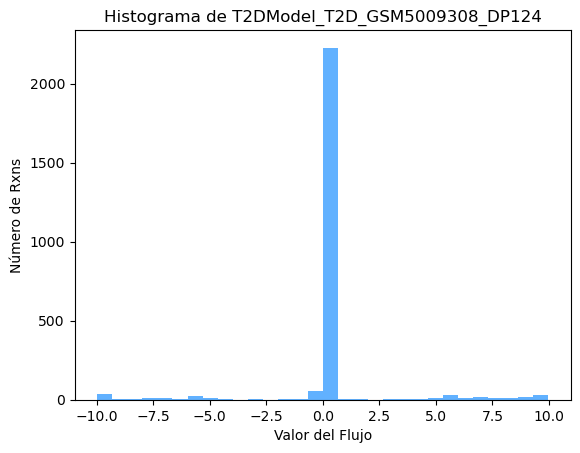

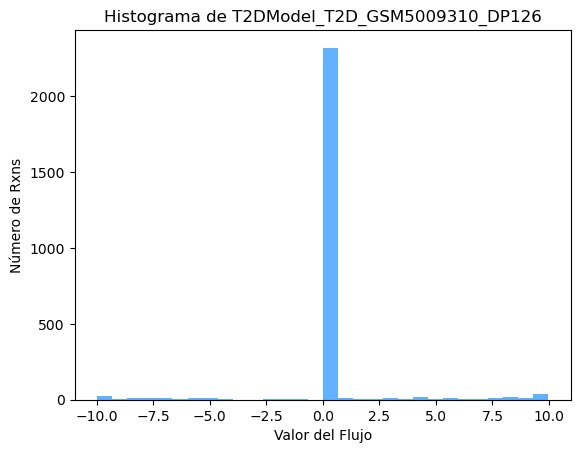

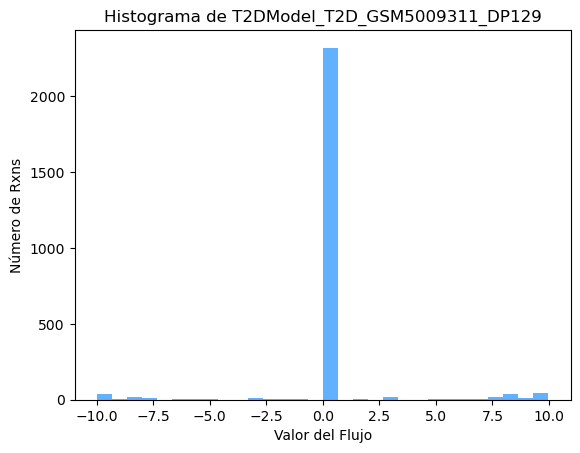

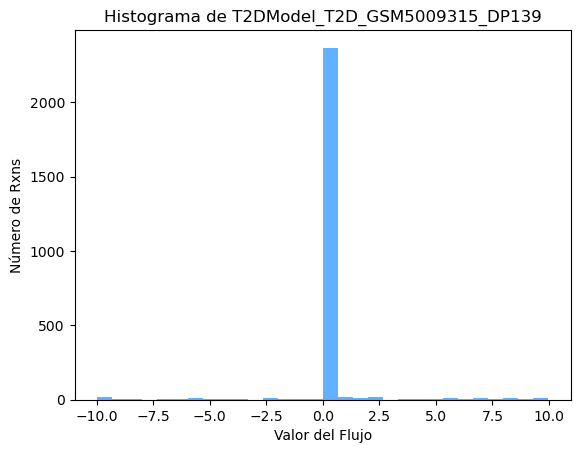

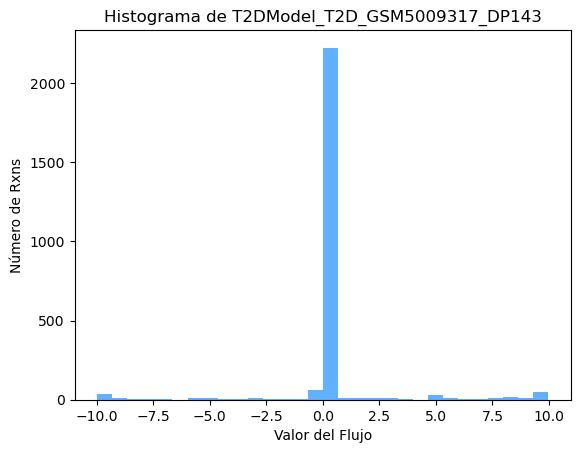

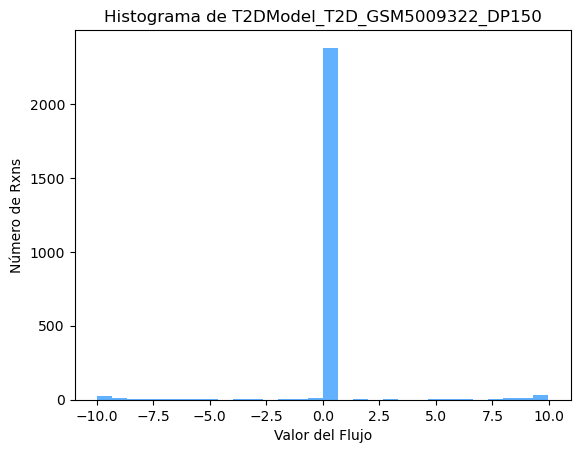

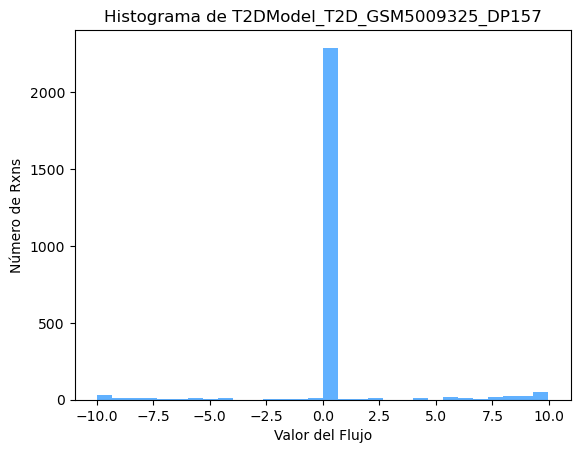

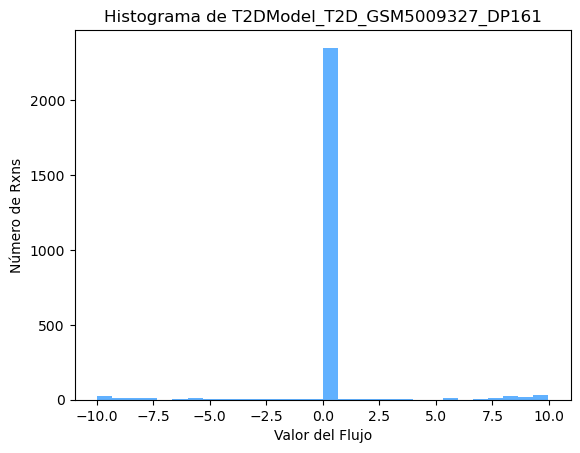

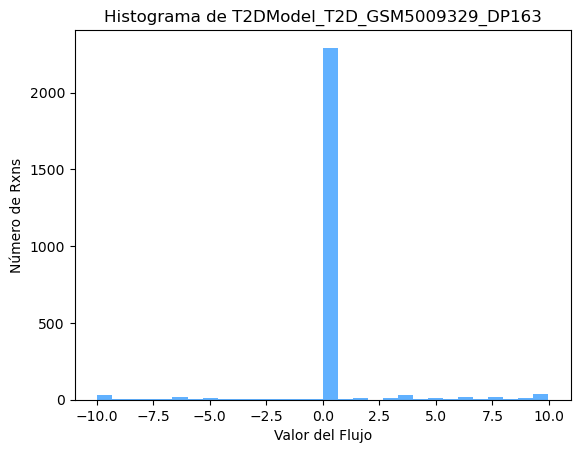

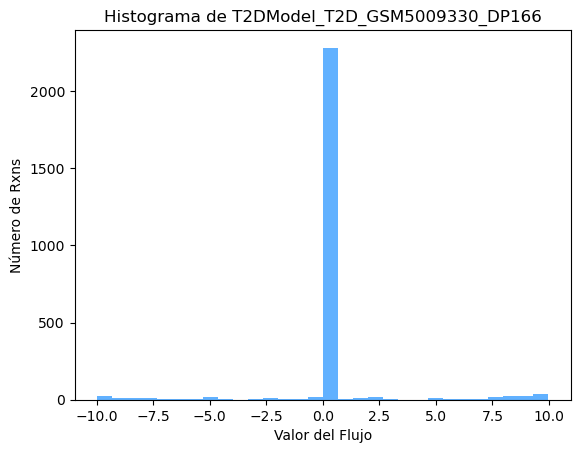

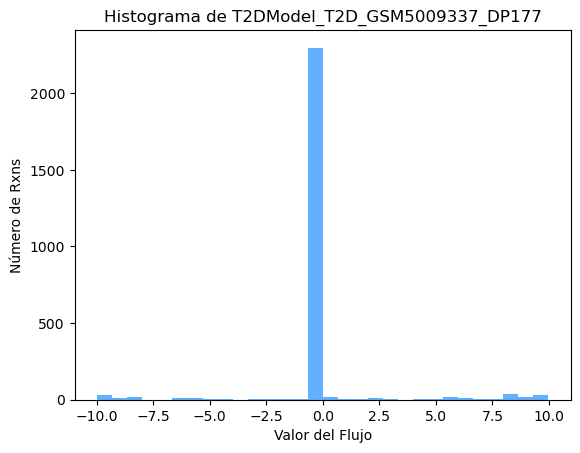

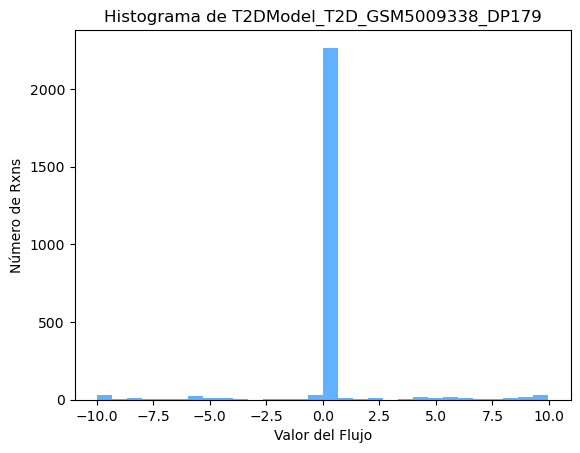

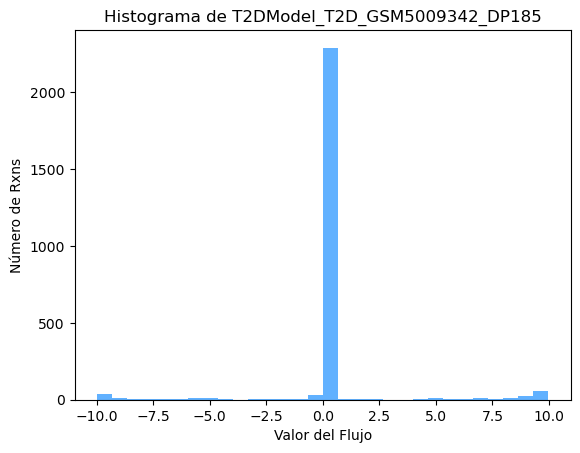

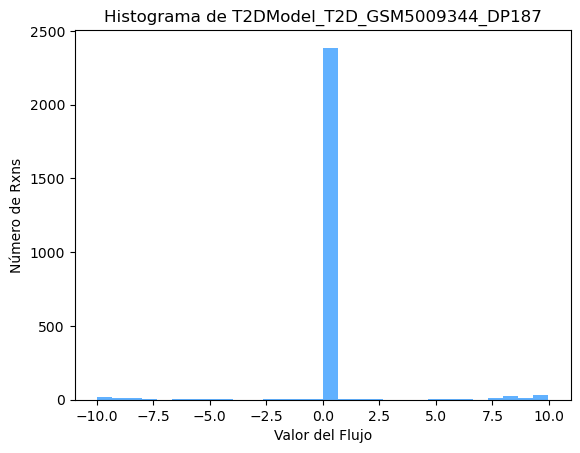

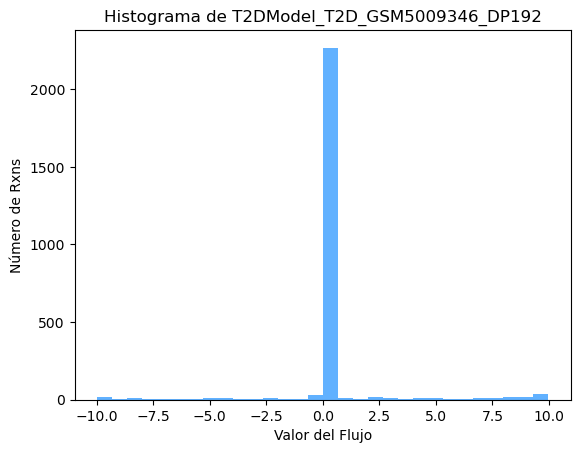

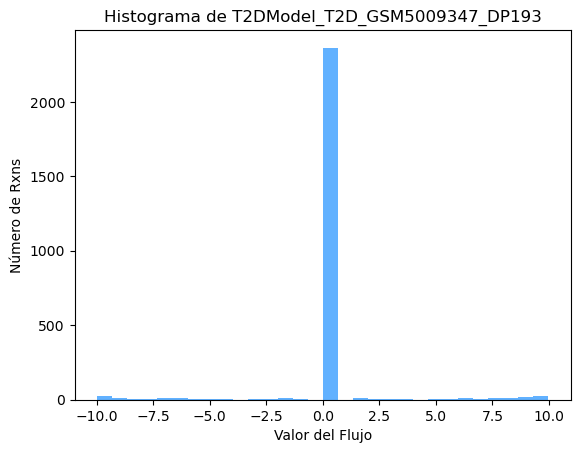

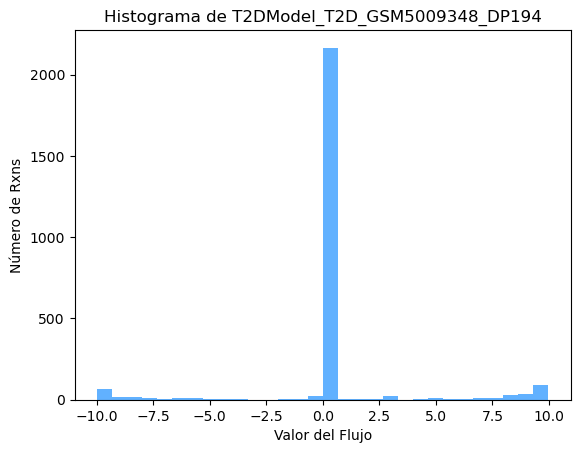

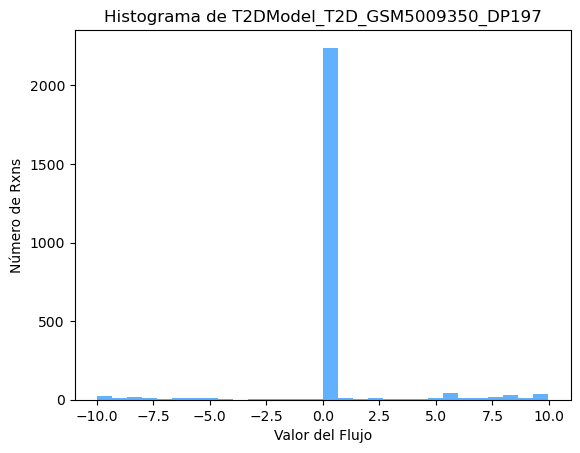

In [8]:
filas_flujos_T2D = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('T2D')]

for indice in filas_flujos_T2D.index:
    fila_data = filas_flujos_T2D.loc[indice]
    plt.figure()  
    hist = plt.hist(fila_data, bins=30, color='dodgerblue', alpha=0.7)
    plt.title(f'Histograma de {indice}')
    plt.xlabel('Valor del Flujo')
    plt.ylabel('Número de Rxns')
plt.show()

C:\Users\NOE\AppData\Local\Temp\ipykernel_39040\4116592032.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


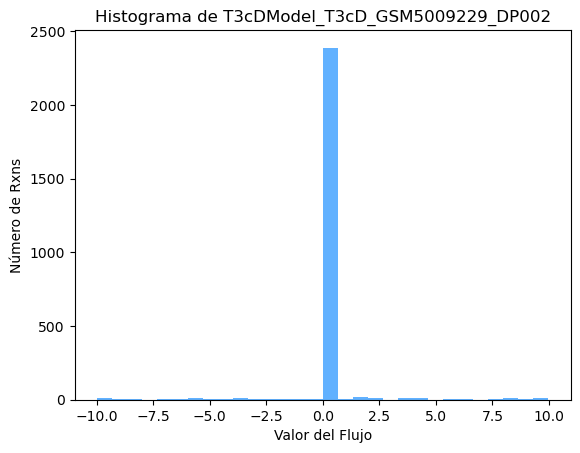

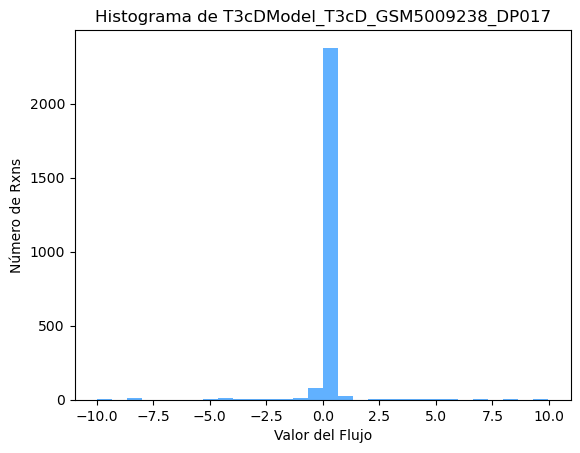

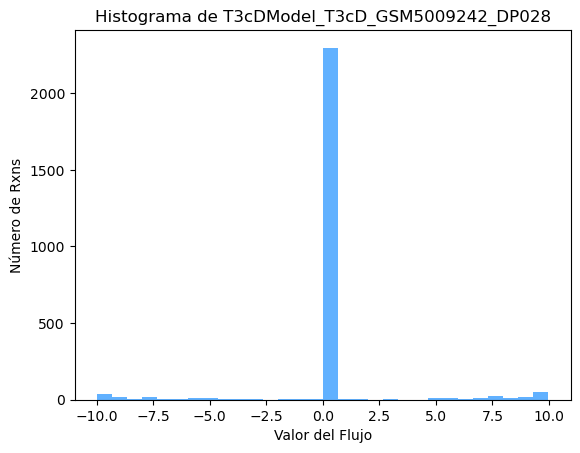

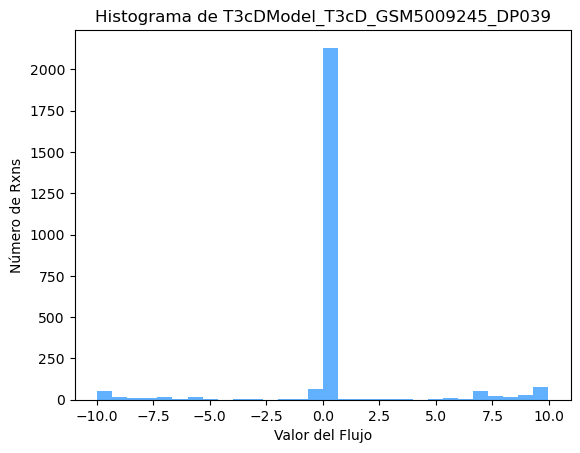

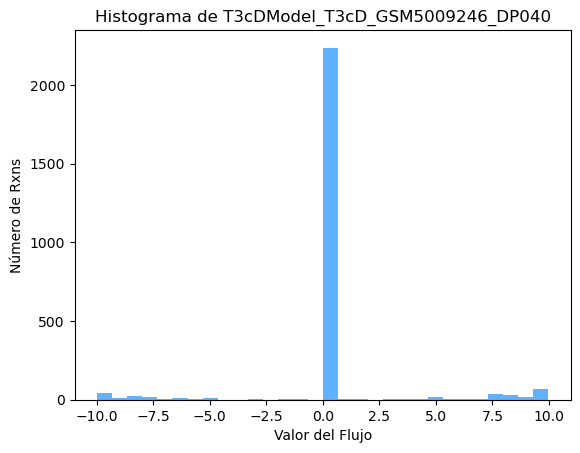

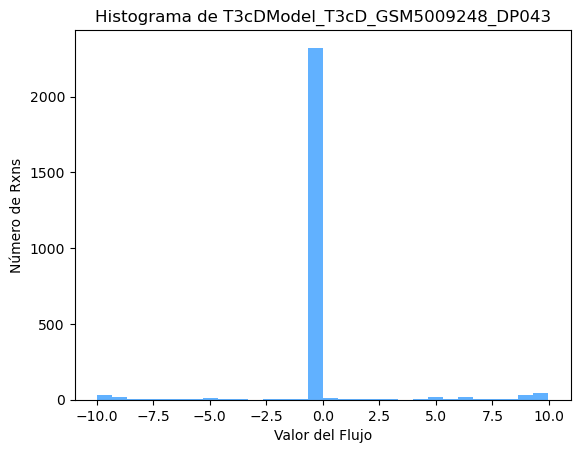

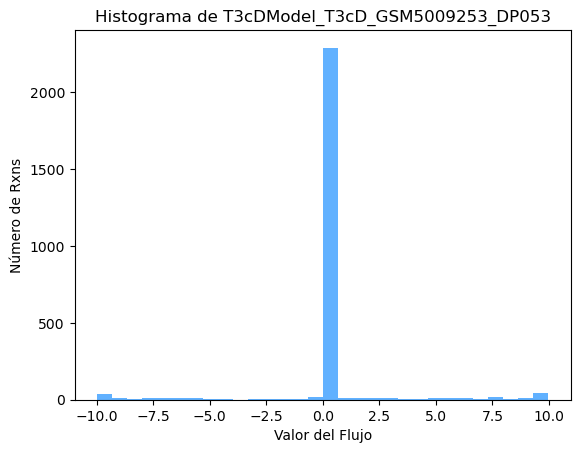

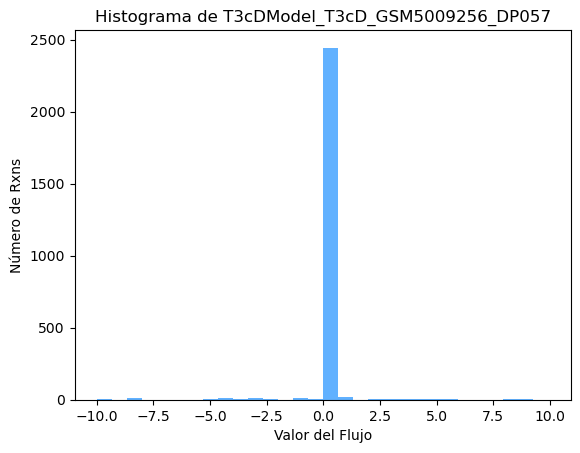

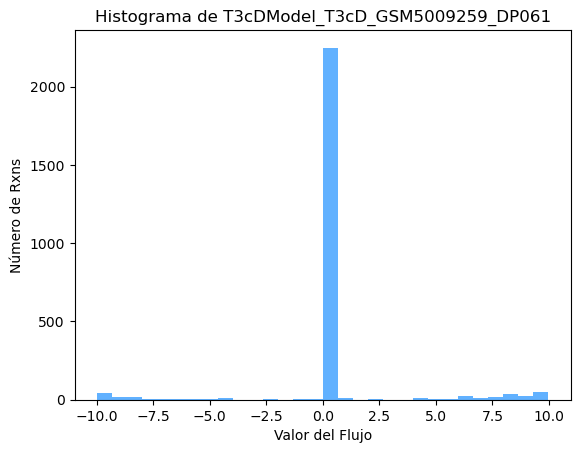

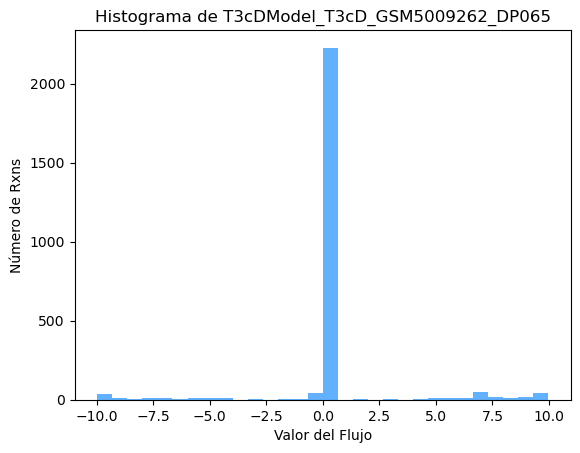

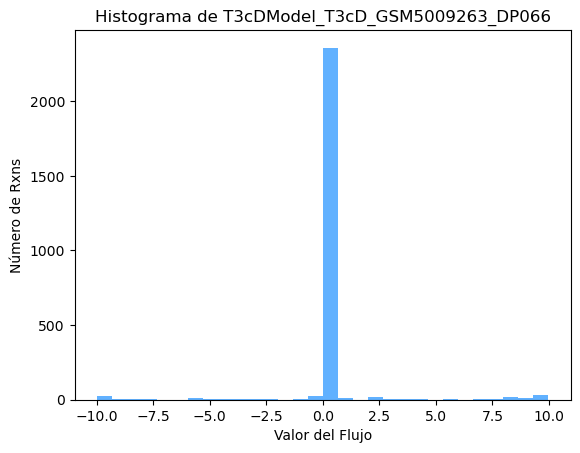

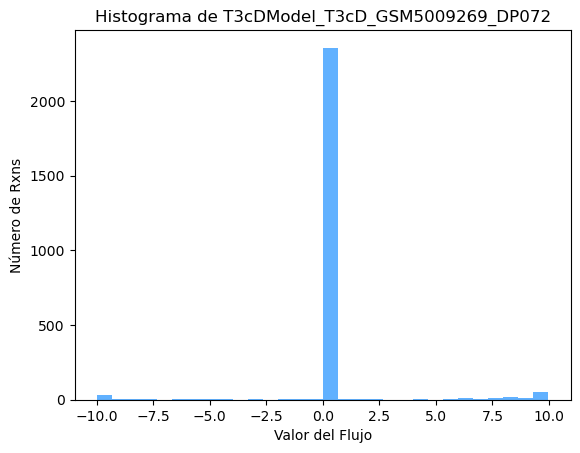

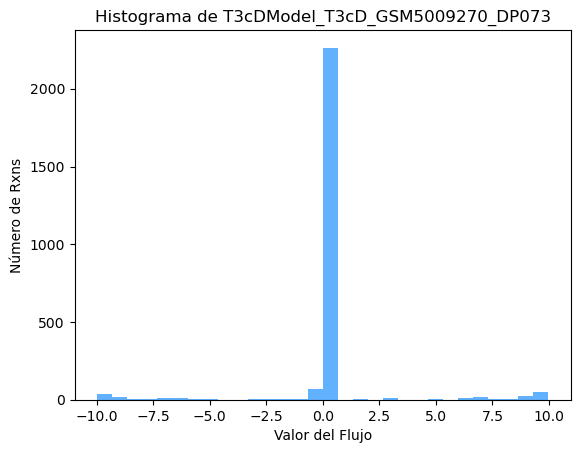

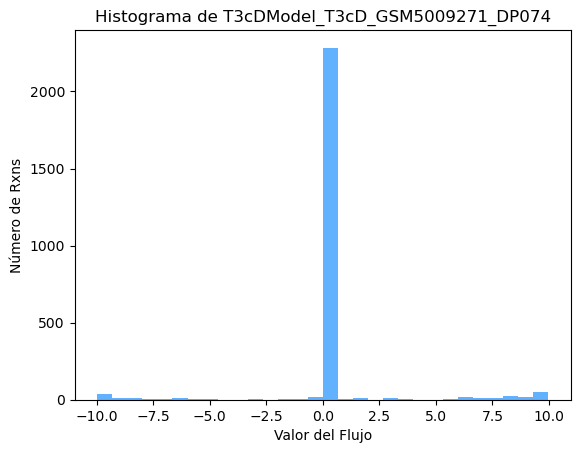

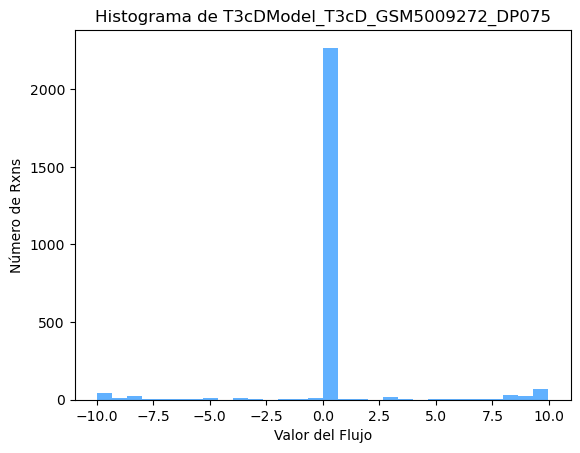

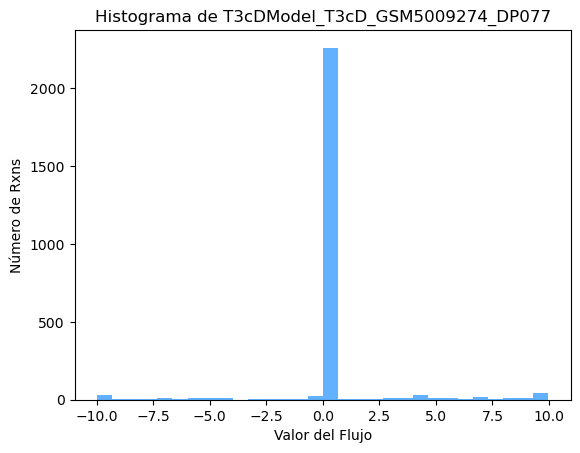

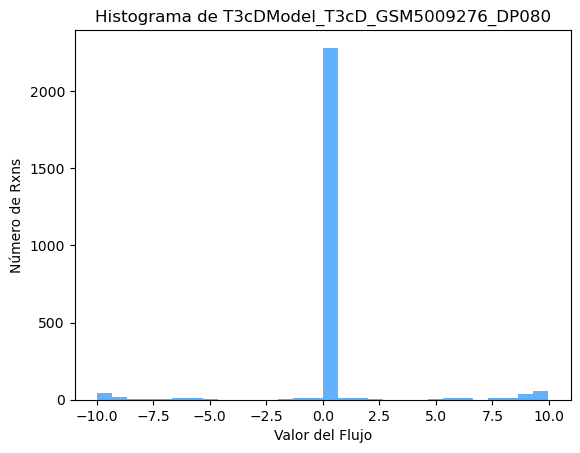

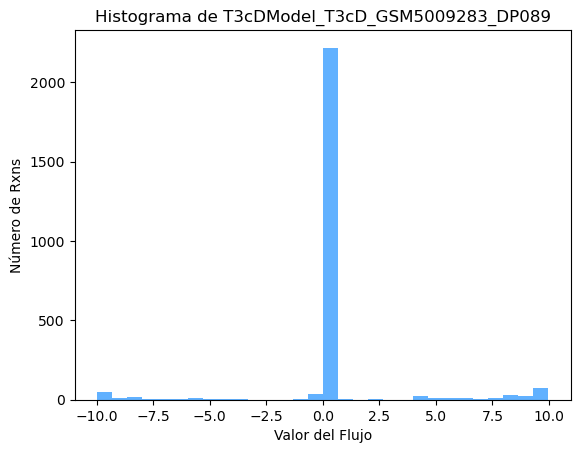

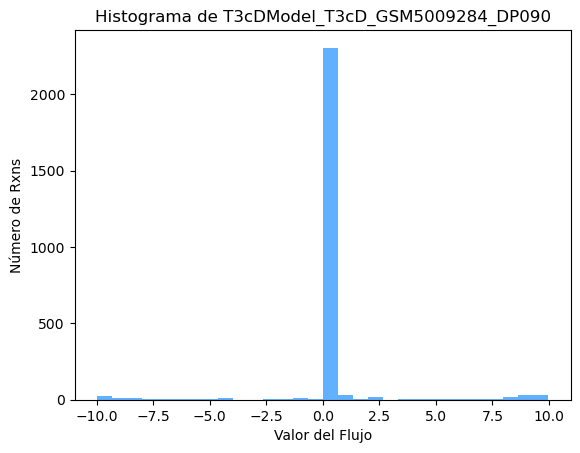

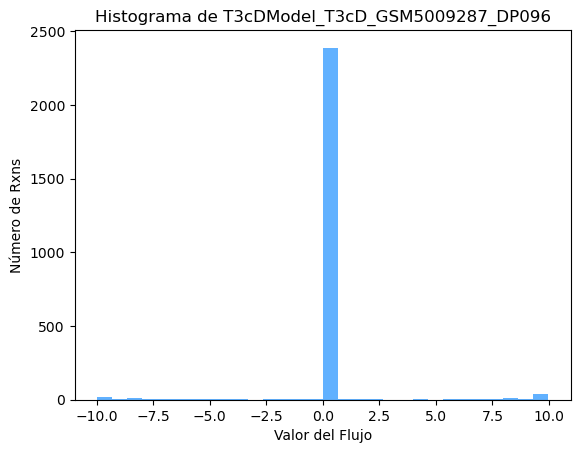

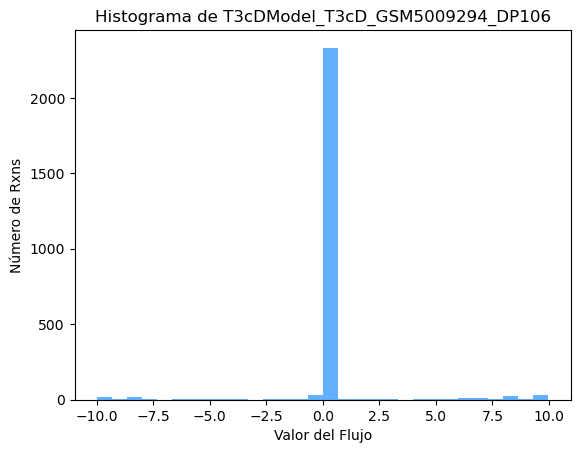

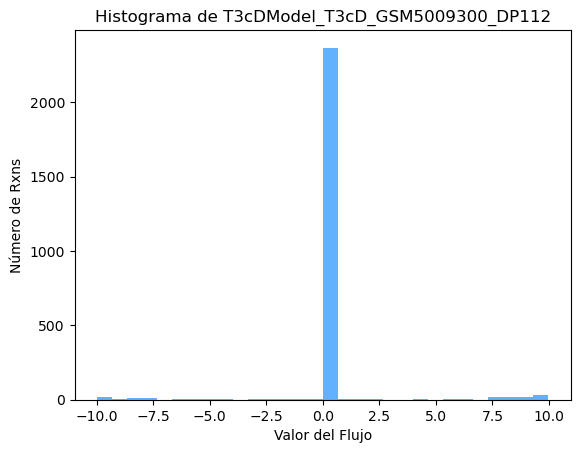

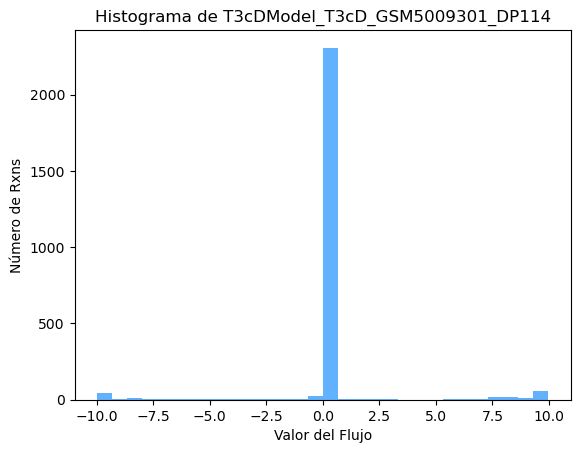

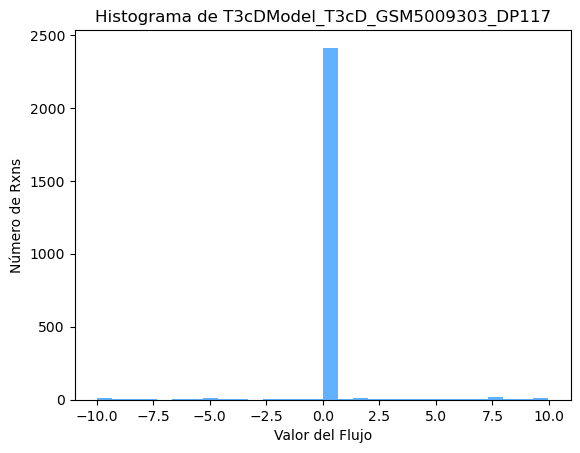

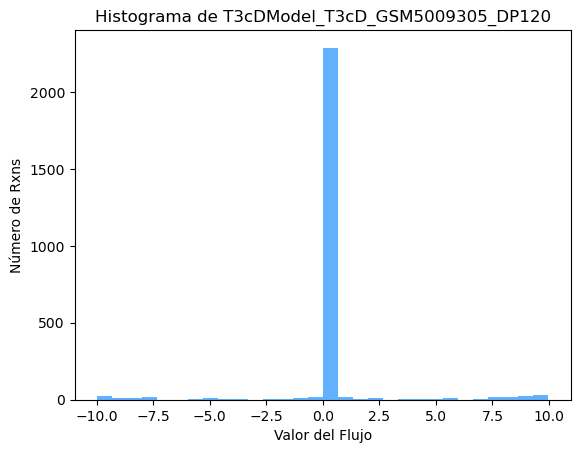

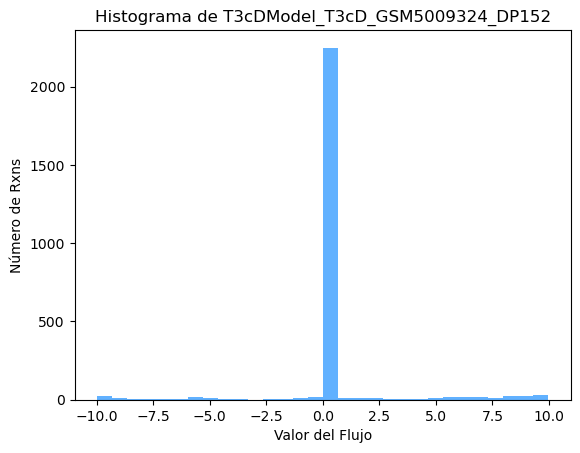

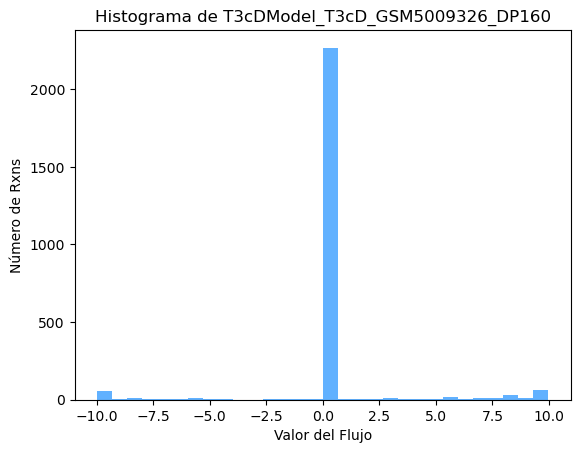

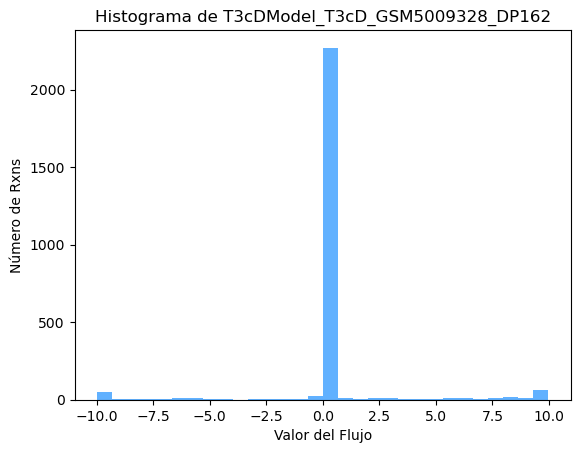

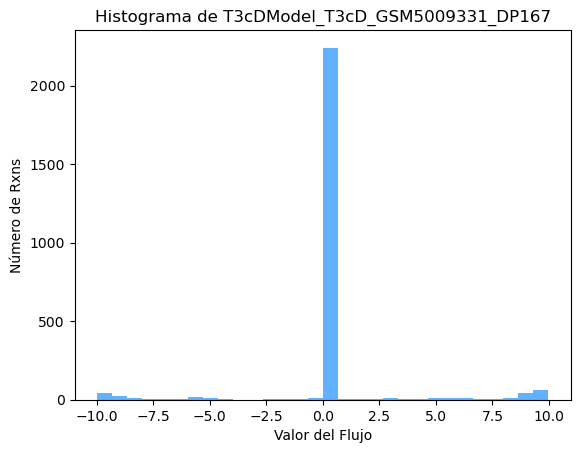

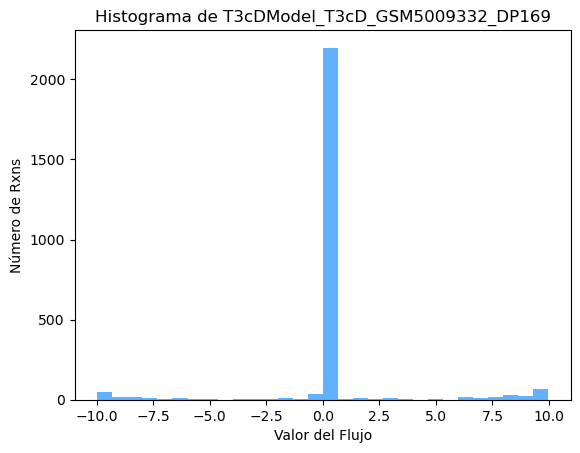

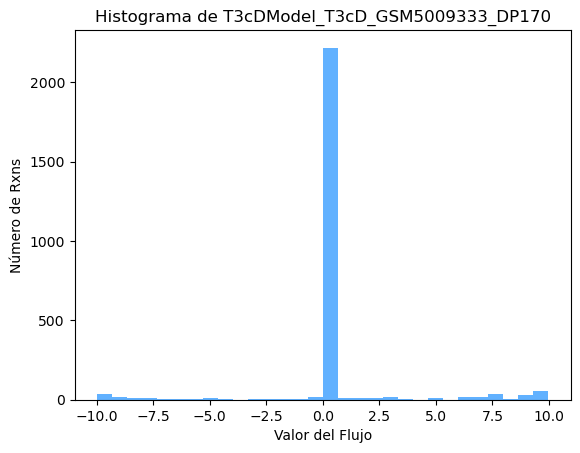

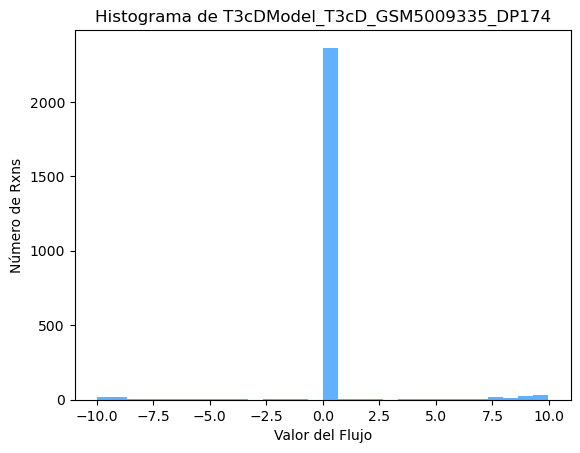

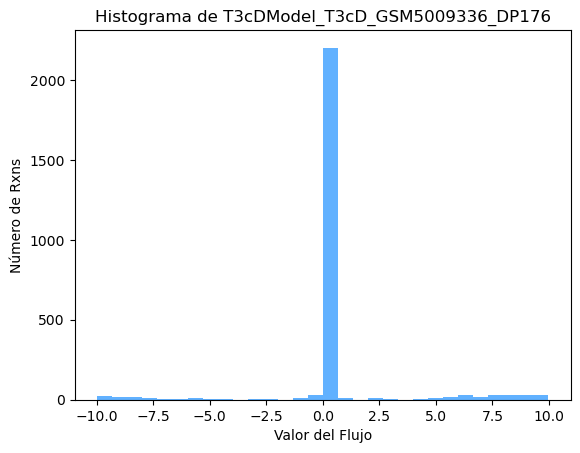

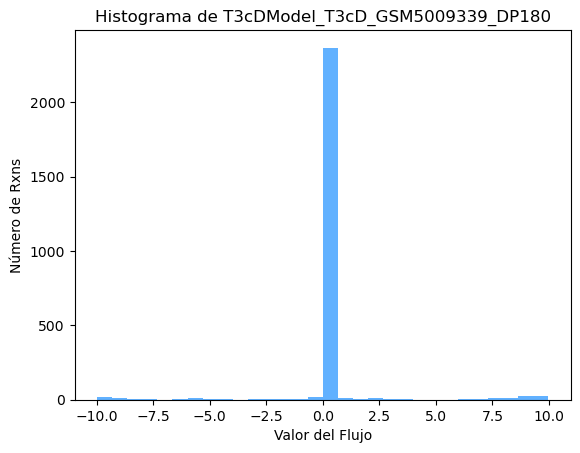

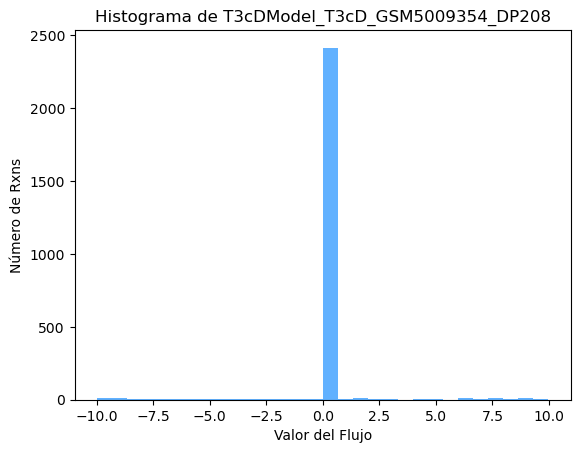

In [9]:
filas_flujos_T3cD = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('T3cD')]

for indice in filas_flujos_T3cD.index:
    fila_data = filas_flujos_T3cD.loc[indice]
    plt.figure()  
    hist = plt.hist(fila_data, bins=30, color='dodgerblue', alpha=0.7)
    plt.title(f'Histograma de {indice}')
    plt.xlabel('Valor del Flujo')
    plt.ylabel('Número de Rxns')
plt.show()

In [10]:
# Mover el índice a una columna y renombrar la columna como "Modelos"
data_copy = t_fluxes_filtered.reset_index()
data_copy.rename(columns={'index': 'Modelos'}, inplace=True)

# Eliminar el nombre de las columnas
data_copy.columns.name = None

# Crear una nueva columna 'patologia' basada en el prefijo del índice
data_copy['patologia'] = ''

# Mapear el prefijo del índice con su respectiva patología
patologia_mapping = {'ND': 'ND', 'T2D': 'T2D', 'IGT': 'IGT', 'T3cD': 'T3cD'}

# Iterar sobre el diccionario de mapeo y asignar la patología correspondiente a los índices
for prefijo, patologia in patologia_mapping.items():
    data_copy.loc[data_copy['Modelos'].str.startswith(prefijo), 'patologia'] = patologia

# Eliminar la columna "Modelos" ya que ahora el índice contiene esta información
data_copy.drop(columns=['Modelos'], inplace=True)

# Mover la columna 'patologia' como la primera
cols = list(data_copy.columns)
cols = ['patologia'] + [col for col in cols if col != 'patologia']
data_copy = data_copy[cols]

# Imprimir el DataFrame resultante
data_copy


patologia  13DAMPPOX  2HBO  2HCO3_NAt  2OXOADOXm   34DHOXPEGOX  \
0         IGT        0.0   0.0  -8.965784        0.0  0.000000e+00   
1         IGT        0.0   0.0   0.000000        0.0  0.000000e+00   
2         IGT        0.0   0.0   0.000000        0.0  0.000000e+00   
3         IGT        0.0   0.0   0.000000        0.0  0.000000e+00   
4         IGT        0.0   0.0   0.000000        0.0  0.000000e+00   
..        ...        ...   ...        ...        ...           ...   
128      T3cD        0.0   0.0   0.000000        0.0  1.900342e+00   
129      T3cD        0.0   0.0   0.000000        0.0  0.000000e+00   
130      T3cD        0.0   0.0   0.000000        0.0  0.000000e+00   
131      T3cD        0.0   0.0   0.000000        0.0 -1.983969e-13   
132      T3cD        0.0   0.0   0.000000        0.0  0.000000e+00   

       34DHOXPEGt  34DHPHAMT  34HPLFM  3AIBTm  ...  r1554  r1565  r1573  \
0    0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
1    0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
2    0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
3    0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
4    0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
..            ...        ...      ...     ...  ...    ...    ...    ...   
128  1.900342e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
129  0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
130  0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   
131 -1.983969e-13        0.0      0.0     0.0  ...    0.0    0.0    0.0   
132  0.000000e+00        0.0      0.0     0.0  ...    0.0    0.0    0.0   

     r1593  r1622  r1630  FOLt2  r2320  EX_HC02203[e]  HMR_1321  
0      0.0    0.0    0.0    0.0    0.0            0.0       0.0  
1      0.0    0.0    0.0    0.0    0.0            0.0       0.0  
2      0.0    0.0    0.0    0.0    0.0            0.0       0.0  
3      0.0    0.0    0.0    0.0    0.0            0.0       0.0  
4      0.0    0.0    0.0    0.0    0.0            0.0       0.0  
..     ...    ...    ...    ...    ...            ...       ...  
128    0.0    0.0    0.0    0.0    0.0            0.0       0.0  
129    0.0    0.0    0.0    0.0    0.0            0.0       0.0  
130    0.0    0.0    0.0    0.0    0.0            0.0       0.0  
131    0.0    0.0    0.0    0.0    0.0            0.0       0.0  
132    0.0    0.0    0.0    0.0    0.0            0.0       0.0  

[133 rows x 2575 columns]

In [13]:
x = data_copy.iloc[:, 1:2575].values  
y = data_copy.loc[:, ["patologia"]].values

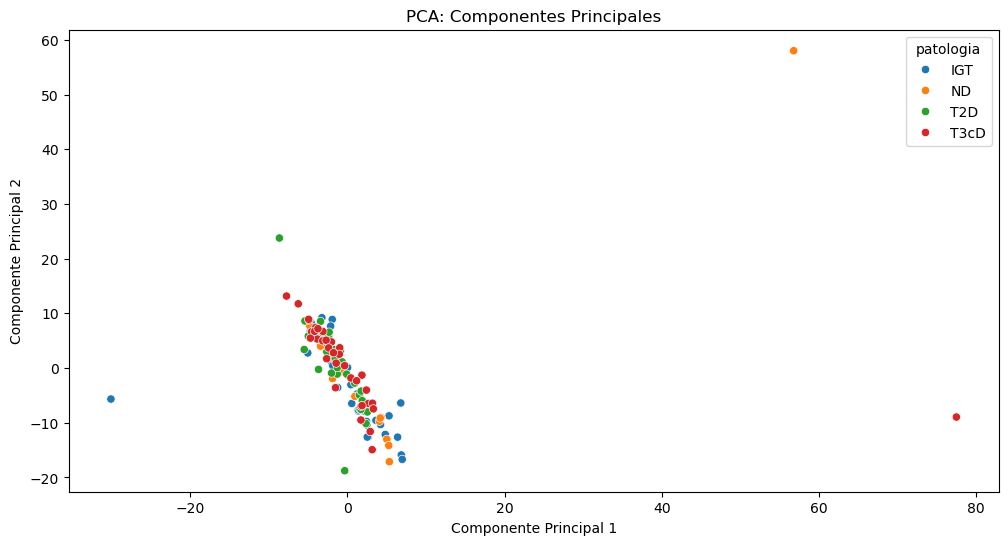

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

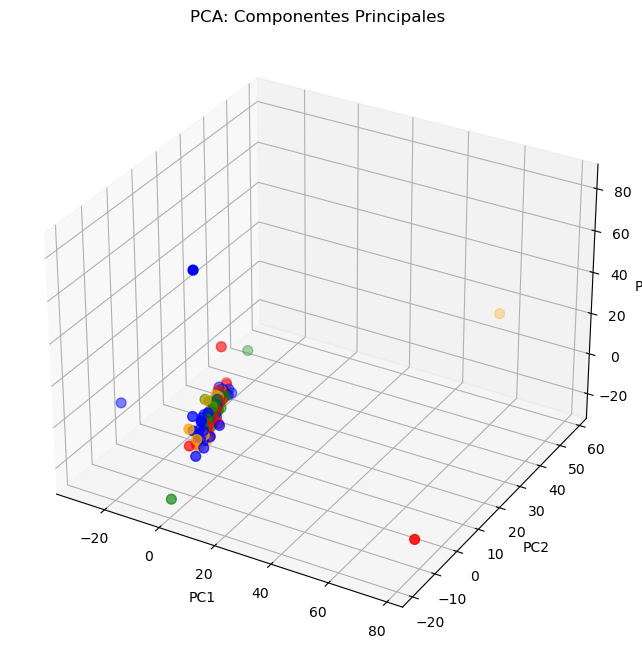

In [15]:
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=3)
components = pca.fit_transform(x_scaled)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2', 'PC3'])

# Concatenar con la columna 'patologia'
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)

# Crear un diccionario para asignar colores a las categorías
color_dict = {'IGT': 'blue', 'ND': 'orange', 'T2D':'green', 'T3cD':'red'}

# Mapear las etiquetas de 'patologia' a colores usando el diccionario
colors = pcaDF['patologia'].map(color_dict)

# Graficar los resultados
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pcaDF['PC1'], pcaDF['PC2'], pcaDF['PC3'], c=colors, s=50)

# Label axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Title
plt.title('PCA: Componentes Principales')

plt.show()

In [16]:
IGT_samples = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('IGT')]

ND_samples = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('ND')]

T2D_samples = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('T2D')]

T3cD_samples = t_fluxes_filtered[t_fluxes_filtered.index.str.startswith('T3cD')]

In [17]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import multitest
from statsmodels.stats.multitest import multipletests

t_statistic, p_values = stats.ttest_ind(T2D_samples, ND_samples, axis = 0, nan_policy = 'omit')
fold_change = np.mean(T2D_samples, axis=0) - np.mean(ND_samples, axis=0)
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject,q_values, _, _ = multipletests(
    p_values,
    alpha=0.05,
    method='fdr_bh',  
    is_sorted=False,
    returnsorted=False)

t_results = pd.DataFrame({
    'reaction': t_fluxes_filtered.columns,
    'p_value': p_values,
    'q_value': q_values,
    'Diferencia': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['Diferencia'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['Diferencia'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_results[t_results['sign'] != 'NO SIGNIFICANCE']
print(t_fluxes_sign)
print(t_fluxes_sign['sign'].to_string(index=False))

                    reaction   p_value   q_value    Diferencia    sign
13DAMPPOX          13DAMPPOX  0.501833  0.870215 -2.707236e-15  NORMAL
2HBO                    2HBO  0.671352  1.000000  2.412037e-01  NORMAL
2HCO3_NAt          2HCO3_NAt  0.263245  0.870215 -1.065122e+00  NORMAL
2OXOADOXm          2OXOADOXm  0.501833  0.870215  1.198472e-15  NORMAL
34DHOXPEGOX      34DHOXPEGOX  0.697904  1.000000 -1.012902e-01  NORMAL
...                      ...       ...       ...           ...     ...
r1630                  r1630  1.000000  1.000000  0.000000e+00  NORMAL
FOLt2                  FOLt2  1.000000  1.000000  0.000000e+00  NORMAL
r2320                  r2320  1.000000  1.000000  0.000000e+00  NORMAL
EX_HC02203[e]  EX_HC02203[e]  1.000000  1.000000  0.000000e+00  NORMAL
HMR_1321            HMR_1321  1.000000  1.000000  0.000000e+00  NORMAL

[2574 rows x 5 columns]
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORM

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


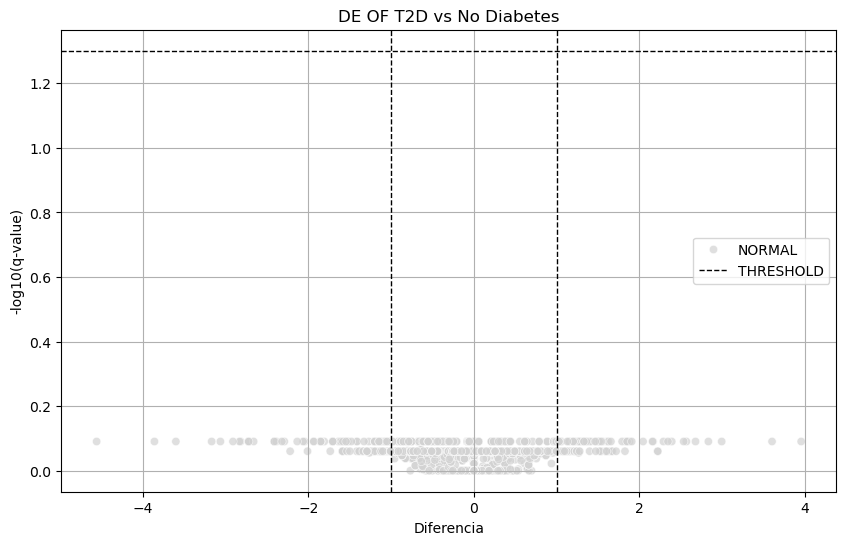

In [18]:
plt.figure(figsize = (10, 6))
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}

sns.scatterplot(x = t_results['Diferencia'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T2D vs No Diabetes')
plt.legend()
plt.grid(True)


up_down_results = t_results[(t_results['q_value'] < 0.05) &
                            ((t_results['sign'] == 'UP') | (t_results['sign'] == 'DOWN'))]



In [19]:
t_statistic, p_values = stats.ttest_ind(IGT_samples, ND_samples, axis = 0, nan_policy = 'omit')
fold_change = np.mean(IGT_samples, axis=0) - np.mean(ND_samples, axis=0)
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject,q_values, _, _ = multipletests(
    p_values,
    alpha=0.05,
    method='fdr_bh',  
    is_sorted=False,
    returnsorted=False)

t_results = pd.DataFrame({
    'reaction': t_fluxes_filtered.columns,
    'p_value': p_values,
    'q_value': q_values,
    'Diferencia': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['Diferencia'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['Diferencia'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_results[t_results['sign'] != 'NO SIGNIFICANCE']
print(t_fluxes_sign)
print(t_fluxes_sign['sign'].to_string(index=False))

                    reaction   p_value   q_value    Diferencia    sign
13DAMPPOX          13DAMPPOX  1.000000  1.000000  0.000000e+00  NORMAL
2HBO                    2HBO  0.909440  1.000000 -5.400230e-02  NORMAL
2HCO3_NAt          2HCO3_NAt  0.248071  0.936164 -6.881058e-01  NORMAL
2OXOADOXm          2OXOADOXm  0.512325  0.936164 -7.852797e-16  NORMAL
34DHOXPEGOX      34DHOXPEGOX  0.793137  1.000000  8.587981e-02  NORMAL
...                      ...       ...       ...           ...     ...
r1630                  r1630  1.000000  1.000000  0.000000e+00  NORMAL
FOLt2                  FOLt2  1.000000  1.000000  0.000000e+00  NORMAL
r2320                  r2320  1.000000  1.000000  0.000000e+00  NORMAL
EX_HC02203[e]  EX_HC02203[e]  1.000000  1.000000  0.000000e+00  NORMAL
HMR_1321            HMR_1321  1.000000  1.000000  0.000000e+00  NORMAL

[2574 rows x 5 columns]
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORM

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


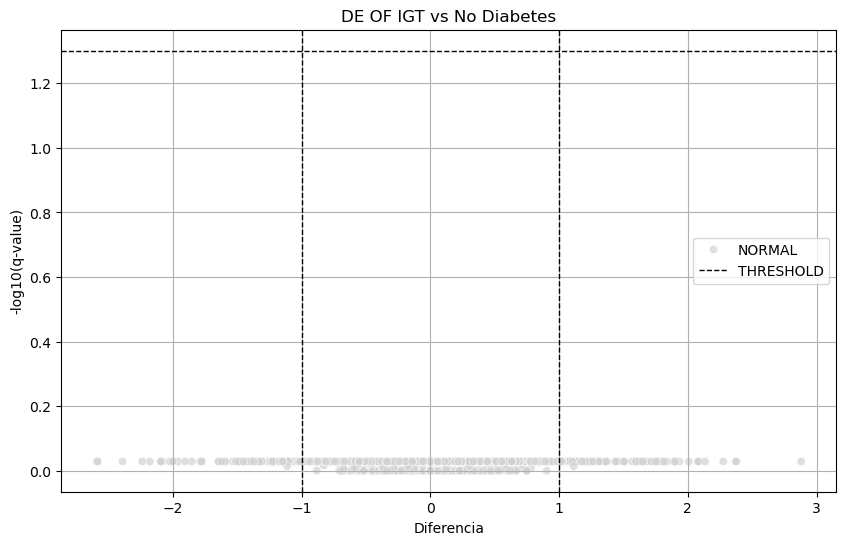

In [20]:
plt.figure(figsize = (10, 6))
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}

sns.scatterplot(x = t_results['Diferencia'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF IGT vs No Diabetes')
plt.legend()
plt.grid(True)


up_down_results = t_results[(t_results['q_value'] < 0.05) &
                            ((t_results['sign'] == 'UP') | (t_results['sign'] == 'DOWN'))]



In [21]:
t_statistic, p_values = stats.ttest_ind(T3cD_samples, ND_samples, axis = 0, nan_policy = 'omit')
fold_change = np.mean(T3cD_samples, axis=0) - np.mean(ND_samples, axis=0)
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject,q_values, _, _ = multipletests(
    p_values,
    alpha=0.05,
    method='fdr_bh',  
    is_sorted=False,
    returnsorted=False)

t_results = pd.DataFrame({
    'reaction': t_fluxes_filtered.columns,
    'p_value': p_values,
    'q_value': q_values,
    'Diferencia': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['Diferencia'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['Diferencia'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_results[t_results['sign'] != 'NO SIGNIFICANCE']
print(t_fluxes_sign)
print(t_fluxes_sign['sign'].to_string(index=False))

                    reaction   p_value   q_value  Diferencia    sign
13DAMPPOX          13DAMPPOX  1.000000  1.000000    0.000000  NORMAL
2HBO                    2HBO  0.310402  0.866395   -0.569473  NORMAL
2HCO3_NAt          2HCO3_NAt  0.026426  0.866395   -1.974129  NORMAL
2OXOADOXm          2OXOADOXm  1.000000  1.000000    0.000000  NORMAL
34DHOXPEGOX      34DHOXPEGOX  0.700099  1.000000    0.143609  NORMAL
...                      ...       ...       ...         ...     ...
r1630                  r1630  0.478638  0.866395    0.084862  NORMAL
FOLt2                  FOLt2  0.478638  0.866395   -0.271482  NORMAL
r2320                  r2320  0.478638  0.866395   -0.284737  NORMAL
EX_HC02203[e]  EX_HC02203[e]  0.478638  0.866395    0.284737  NORMAL
HMR_1321            HMR_1321  0.478638  0.866395   -0.284737  NORMAL

[2574 rows x 5 columns]
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL


C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


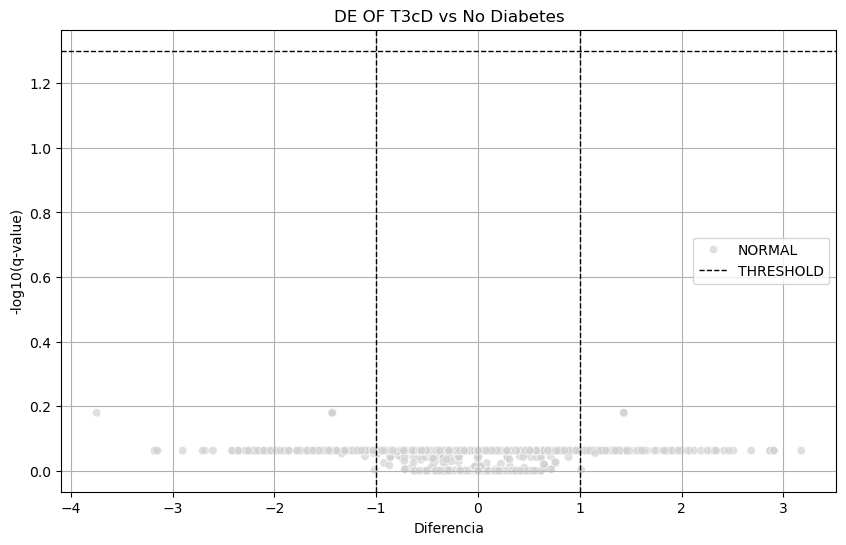

In [22]:
plt.figure(figsize = (10, 6))
colors = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}

sns.scatterplot(x = t_results['Diferencia'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T3cD vs No Diabetes')
plt.legend()
plt.grid(True)


up_down_results = t_results[(t_results['q_value'] < 0.05) &
                            ((t_results['sign'] == 'UP') | (t_results['sign'] == 'DOWN'))]

